In [1]:
import pandas as pd
import numpy as np
import pickle as pk
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams['figure.dpi'] = 300
import scipy.stats
import scipy.signal as signal
from windrose import WindroseAxes

# Process Data

In [2]:
### Load data
prof_dict_ca20 = pk.load( open('data/call-area-profiles-ca20.p', "rb" ) )
prof_dict_wtk = pk.load( open('data/call-area-profiles-wtk.p', "rb" ) )

df_cd = prof_dict_ca20['diablo'].copy()
df_ch = prof_dict_ca20['humboldt'].copy()
df_cm = prof_dict_ca20['morro'].copy()
df_wd = prof_dict_wtk['diablo'].copy()
df_wh = prof_dict_wtk['humboldt'].copy()
df_wm = prof_dict_wtk['morro'].copy()

### Mean Profiles

In [3]:
# ### Obtain mean profiles
# heights_c = np.array([10, 40, 60, 80, 100, 120, 140, 160, 180, 200])
# heights_w = np.array([10, 40, 60, 80, 100, 120, 140, 160, 200])

# # Initialize
# mean_cd = np.zeros_like(heights_c)
# mean_ch = np.zeros_like(heights_c)
# mean_cm = np.zeros_like(heights_c)
# mean_wd = np.zeros_like(heights_w)
# mean_wh = np.zeros_like(heights_w)
# mean_wm = np.zeros_like(heights_w)

# ## Mean profiles
# # Diablo
# mean_cd[0] = df_cd['windspeed_10m'].mean()
# mean_cd[1] = df_cd['windspeed_40m'].mean()
# mean_cd[2] = df_cd['windspeed_60m'].mean()
# mean_cd[3] = df_cd['windspeed_80m'].mean()
# mean_cd[4] = df_cd['windspeed_100m'].mean()
# mean_cd[5] = df_cd['windspeed_120m'].mean()
# mean_cd[6] = df_cd['windspeed_140m'].mean()
# mean_cd[7] = df_cd['windspeed_160m'].mean()
# mean_cd[8] = df_cd['windspeed_180m'].mean()
# mean_cd[9] = df_cd['windspeed_200m'].mean()
# mean_cd = mean_cd/100

# mean_wd[0] = df_wd['windspeed_10m'].mean()
# mean_wd[1] = df_wd['windspeed_40m'].mean()
# mean_wd[2] = df_wd['windspeed_60m'].mean()
# mean_wd[3] = df_wd['windspeed_80m'].mean()
# mean_wd[4] = df_wd['windspeed_100m'].mean()
# mean_wd[5] = df_wd['windspeed_120m'].mean()
# mean_wd[6] = df_wd['windspeed_140m'].mean()
# mean_wd[7] = df_wd['windspeed_160m'].mean()
# mean_wd[8] = df_wd['windspeed_200m'].mean()
# mean_wd = mean_wd/100

# # Humboldt
# mean_ch[0] = df_ch['windspeed_10m'].mean()
# mean_ch[1] = df_ch['windspeed_40m'].mean()
# mean_ch[2] = df_ch['windspeed_60m'].mean()
# mean_ch[3] = df_ch['windspeed_80m'].mean()
# mean_ch[4] = df_ch['windspeed_100m'].mean()
# mean_ch[5] = df_ch['windspeed_120m'].mean()
# mean_ch[6] = df_ch['windspeed_140m'].mean()
# mean_ch[7] = df_ch['windspeed_160m'].mean()
# mean_ch[8] = df_ch['windspeed_180m'].mean()
# mean_ch[9] = df_ch['windspeed_200m'].mean()
# mean_ch = mean_ch/100

# mean_wh[0] = df_wh['windspeed_10m'].mean()
# mean_wh[1] = df_wh['windspeed_40m'].mean()
# mean_wh[2] = df_wh['windspeed_60m'].mean()
# mean_wh[3] = df_wh['windspeed_80m'].mean()
# mean_wh[4] = df_wh['windspeed_100m'].mean()
# mean_wh[5] = df_wh['windspeed_120m'].mean()
# mean_wh[6] = df_wh['windspeed_140m'].mean()
# mean_wh[7] = df_wh['windspeed_160m'].mean()
# mean_wh[8] = df_wh['windspeed_200m'].mean()
# mean_wh = mean_wh/100

# # Morro
# mean_cm[0] = df_cm['windspeed_10m'].mean()
# mean_cm[1] = df_cm['windspeed_40m'].mean()
# mean_cm[2] = df_cm['windspeed_60m'].mean()
# mean_cm[3] = df_cm['windspeed_80m'].mean()
# mean_cm[4] = df_cm['windspeed_100m'].mean()
# mean_cm[5] = df_cm['windspeed_120m'].mean()
# mean_cm[6] = df_cm['windspeed_140m'].mean()
# mean_cm[7] = df_cm['windspeed_160m'].mean()
# mean_cm[8] = df_cm['windspeed_180m'].mean()
# mean_cm[9] = df_cm['windspeed_200m'].mean()
# mean_cm = mean_cm/100

# mean_wm[0] = df_wm['windspeed_10m'].mean()
# mean_wm[1] = df_wm['windspeed_40m'].mean()
# mean_wm[2] = df_wm['windspeed_60m'].mean()
# mean_wm[3] = df_wm['windspeed_80m'].mean()
# mean_wm[4] = df_wm['windspeed_100m'].mean()
# mean_wm[5] = df_wm['windspeed_120m'].mean()
# mean_wm[6] = df_wm['windspeed_140m'].mean()
# mean_wm[7] = df_wm['windspeed_160m'].mean()
# mean_wm[8] = df_wm['windspeed_200m'].mean()
# mean_wm = mean_wm/100

In [4]:
# fig, ax = plt.subplots(1, 1, figsize=(3,4), sharex=True, sharey=True)

# ax.plot(mean_ch, heights_c, label='Humboldt')
# ax.plot(mean_cm, heights_c, label='Morro Bay')
# ax.plot(mean_cd, heights_c, label='Diablo Canyon')
# ax.plot(mean_wh, heights_w, color='C0', ls='--')
# ax.plot(mean_wm, heights_w, color='C1', ls='--')
# ax.plot(mean_wd, heights_w, color='C2', ls='--')

# ax.legend()

# plt.show()

### Hub-Height Wind Distribution

In [5]:
### Calculate veer histograms
## Parameters
wind_bins = np.arange(0, 32, 1)

## CA20
wind_ch_hist_np = np.histogram(df_ch['windspeed_120m']/100,
             bins=wind_bins)
wind_cd_hist_np = np.histogram(df_cd['windspeed_120m']/100,
             bins=wind_bins)
wind_cm_hist_np = np.histogram(df_cm['windspeed_120m']/100,
             bins=wind_bins)
wind_ch_hist = scipy.stats.rv_histogram(wind_ch_hist_np)
wind_cd_hist = scipy.stats.rv_histogram(wind_cd_hist_np)
wind_cm_hist = scipy.stats.rv_histogram(wind_cm_hist_np)

## WTK
wind_wh_hist_np = np.histogram(df_wh['windspeed_120m']/100,
             bins=wind_bins)
wind_wd_hist_np = np.histogram(df_wd['windspeed_120m']/100,
             bins=wind_bins)
wind_wm_hist_np = np.histogram(df_wm['windspeed_120m']/100,
             bins=wind_bins)
wind_wh_hist = scipy.stats.rv_histogram(wind_wh_hist_np)
wind_wd_hist = scipy.stats.rv_histogram(wind_wd_hist_np)
wind_wm_hist = scipy.stats.rv_histogram(wind_wm_hist_np)

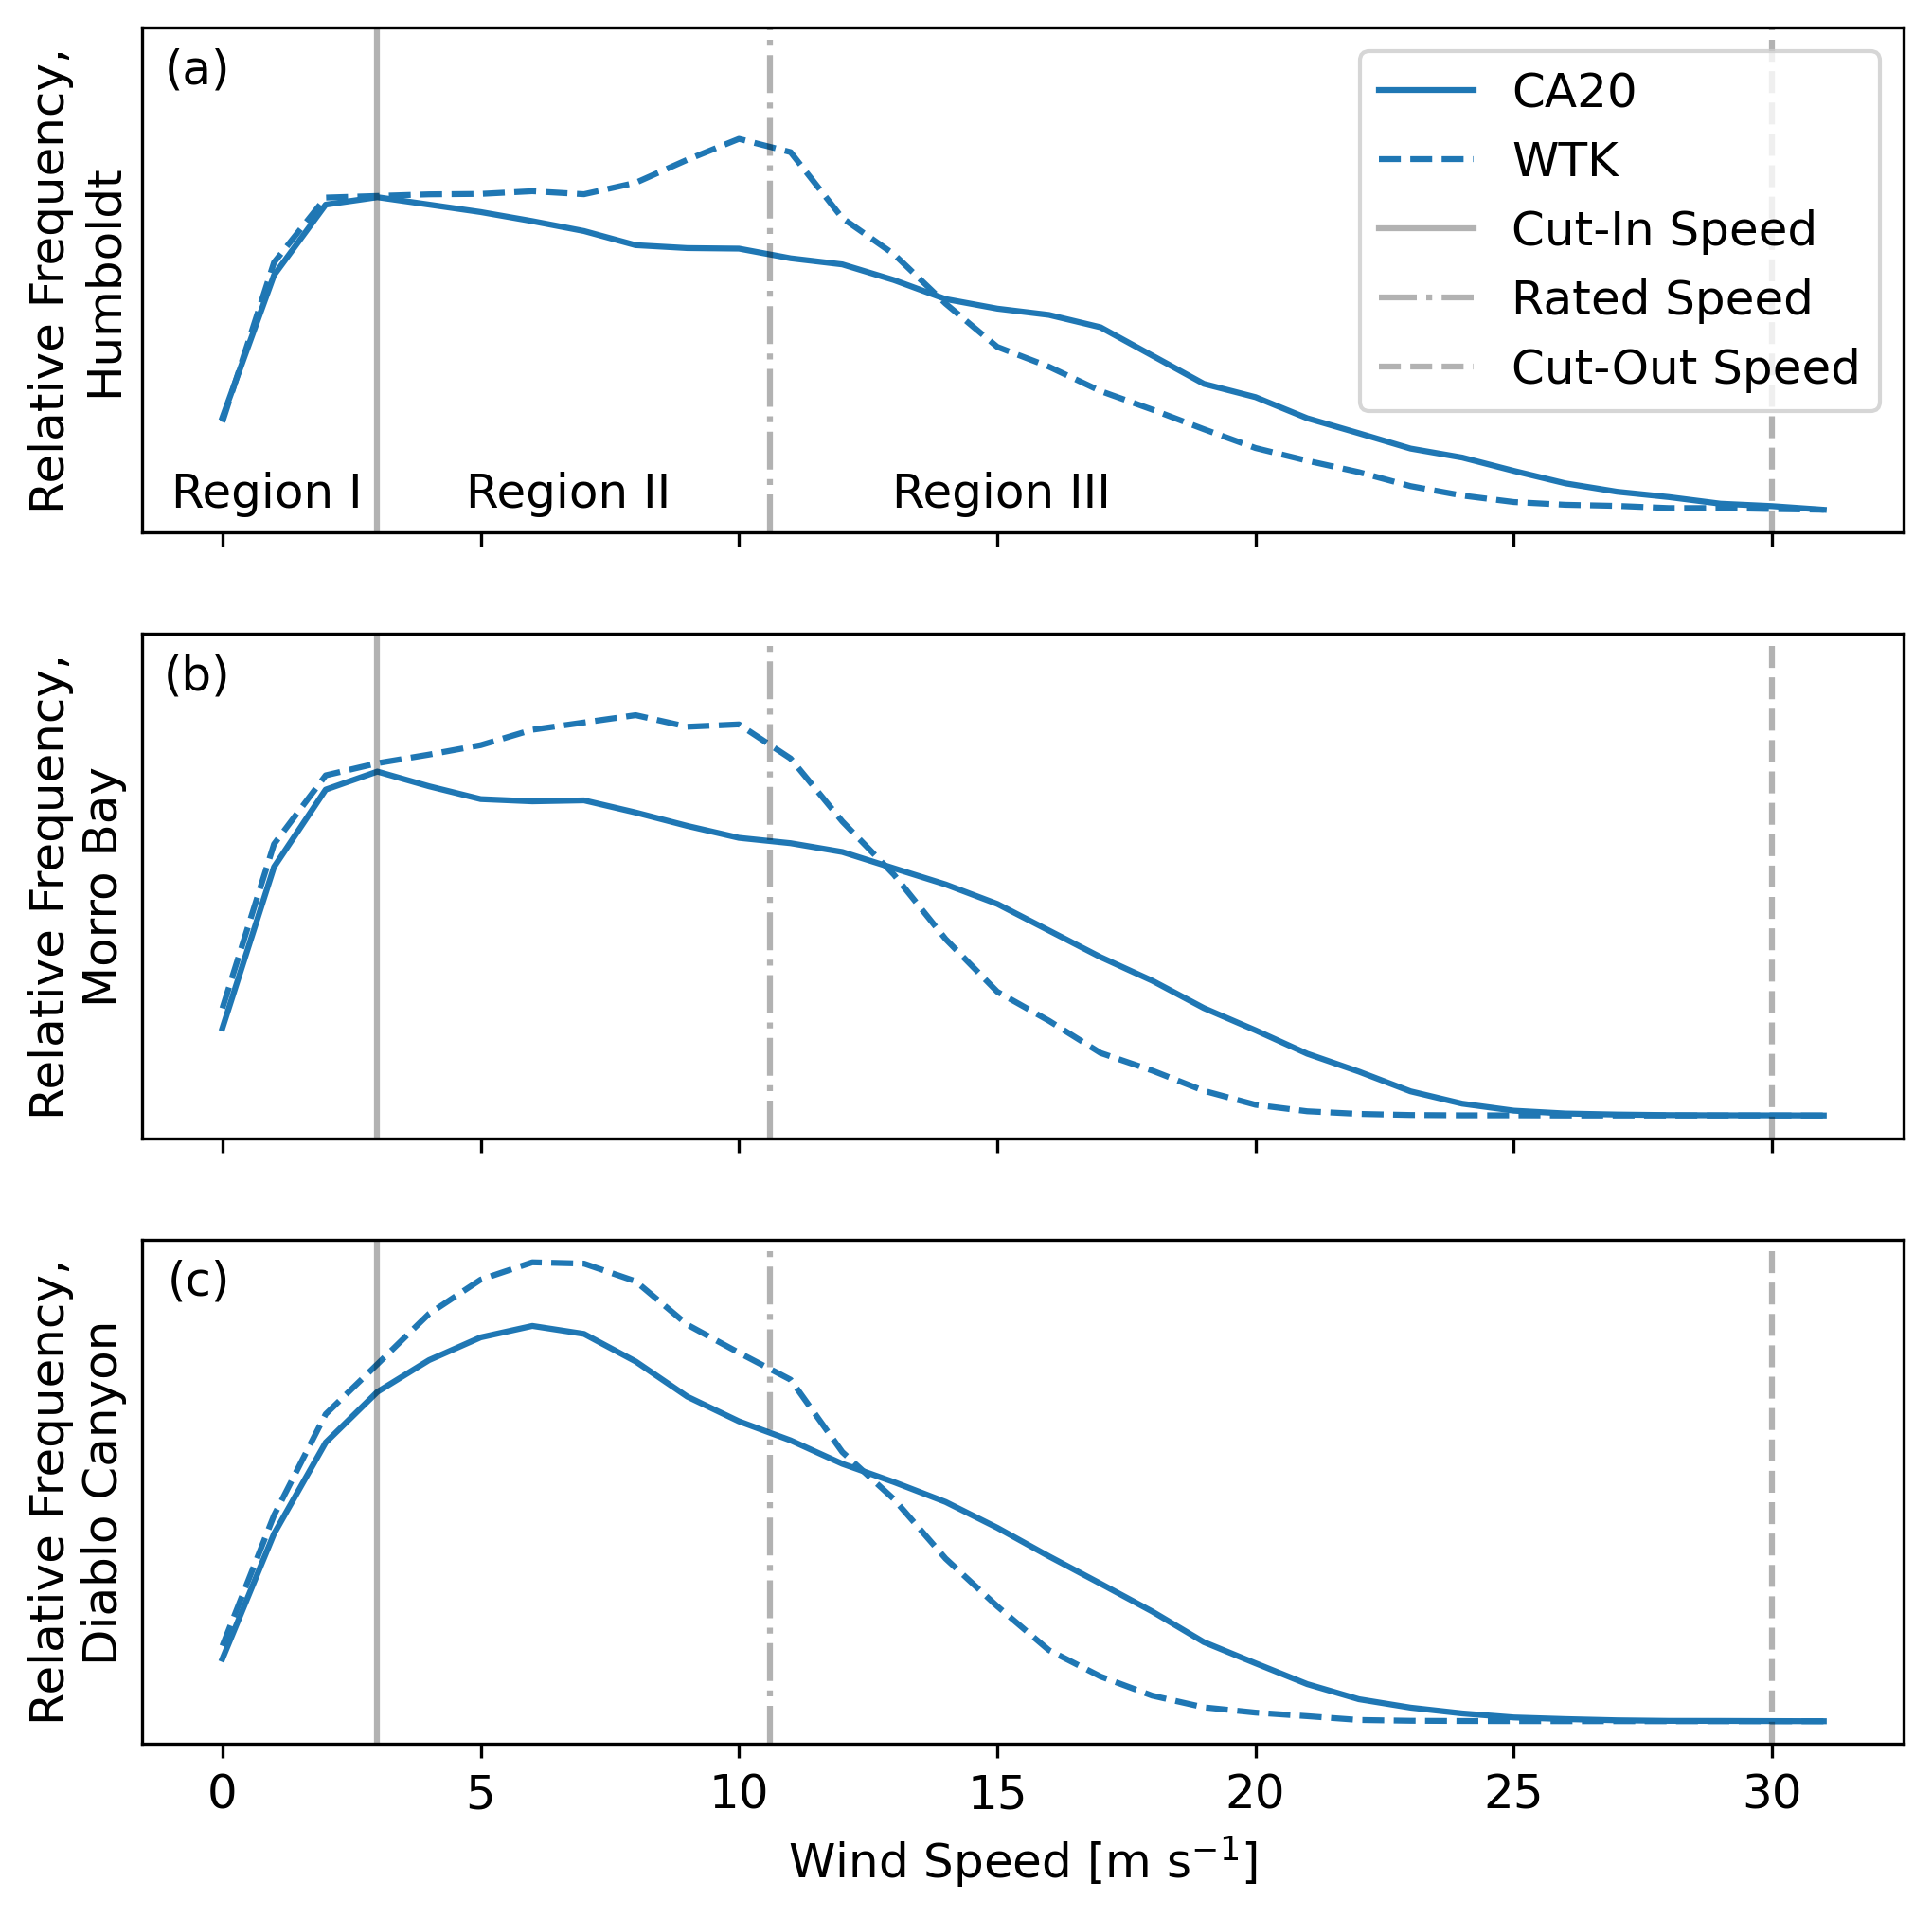

In [6]:
fig, ax = plt.subplots(3, 1, figsize=(8, 8), sharex=True, sharey=True)

ax[0].plot(wind_bins, wind_ch_hist.pdf(wind_bins),
           color='C0', ls='-', label='CA20')
ax[0].plot(wind_bins, wind_wh_hist.pdf(wind_bins),
           color='C0', ls='--', label='WTK')
ax[0].set_ylabel('Relative Frequency,\nHumboldt')
ax[0].axvline(3, color='k', alpha=0.3, label='Cut-In Speed')
ax[0].axvline(10.6, color='k', alpha=0.3, ls='-.', label='Rated Speed')
ax[0].axvline(30, color='k', alpha=0.3, ls='--', label='Cut-Out Speed')
ax[0].legend(loc='upper right')
ax[0].text(0.125,
          0.05,
          'Region I',
          fontsize=12,
          transform = ax[0].transAxes,
          horizontalalignment='right')
ax[0].text(0.30,
          0.05,
          'Region II',
          fontsize=12,
          transform = ax[0].transAxes,
          horizontalalignment='right')
ax[0].text(0.55,
          0.05,
          'Region III',
          fontsize=12,
          transform = ax[0].transAxes,
          horizontalalignment='right')

ax[1].plot(wind_bins, wind_cm_hist.pdf(wind_bins),
           color='C0', ls='-')
ax[1].plot(wind_bins, wind_wm_hist.pdf(wind_bins),
           color='C0', ls='--')
ax[1].set_ylabel('Relative Frequency,\nMorro Bay')
ax[1].axvline(3, color='k', alpha=0.3, label='Cut-In Speed')
ax[1].axvline(10.6, color='k', alpha=0.3, ls='-.', label='Rated Speed')
ax[1].axvline(30, color='k', alpha=0.3, ls='--', label='Cut-Out Speed')

ax[2].plot(wind_bins, wind_cd_hist.pdf(wind_bins),
           color='C0', ls='-')
ax[2].plot(wind_bins, wind_wd_hist.pdf(wind_bins),
           color='C0', ls='--')
ax[2].set_ylabel('Relative Frequency,\nDiablo Canyon')
ax[2].axvline(3, color='k', alpha=0.3, label='Cut-In Speed')
ax[2].axvline(10.6, color='k', alpha=0.3, ls='-.', label='Rated Speed')
ax[2].axvline(30, color='k', alpha=0.3, ls='--', label='Cut-Out Speed')
ax[-1].set_xlabel('Wind Speed [m s$^{-1}$]')

ax[0].axes.get_yaxis().set_ticks([])
ax[1].axes.get_yaxis().set_ticks([])
ax[2].axes.get_yaxis().set_ticks([])

ax[0].text(0.05,
          0.89,
          '(a)',
          fontsize=12,
          transform = ax[0].transAxes,
          horizontalalignment='right',
            color='black')
ax[1].text(0.05,
          0.89,
          '(b)',
          fontsize=12,
          transform = ax[1].transAxes,
          horizontalalignment='right',
            color='black')
ax[2].text(0.05,
          0.89,
          '(c)',
          fontsize=12,
          transform = ax[2].transAxes,
          horizontalalignment='right',
            color='black')


# # plt.savefig('../figures/fig10.png', bbox_inches='tight')
# # plt.savefig('../figures/fig10.pdf', bbox_inches='tight')

plt.show()

In [7]:
# fig = plt.figure(figsize=(8,6))
# # plt.rcParams['axes.linewidth'] = 3
# rect = [0,0,1,1] 
# ax = WindroseAxes(fig, rect)
# fig.add_axes(ax)

# ax.bar(df_ch['winddirection_100m'],
#           df_ch['windspeed_100m']/100,
#           bins=np.arange(0,25,5),
#           normed=True,
#           opening=1,
#           edgecolor='white',
#           nsector=24,
#           cmap=cm.viridis)

# ax.set_legend(fontsize=18)
# plt.xticks(fontsize=18)
# plt.xticks(fontsize=18)
# plt.legend(loc='lower right', decimal_places=1, units=None, fontsize=18)
# plt.bbox_inches = 'tight'


# plt.show()

In [8]:
# ### Wind rose code (courtesy of Nicola)
# # Create wind speed and direction variables
# wspd = df_ch['windspeed_100m']/100
# wdir = df_ch['winddirection_100m']

# # font sizes:
# cb_fs = 18
# lb_fs = 18
# tk_fs = 14
# bx_fs = 20

# fig = plt.figure(figsize=[8,6])
# rect = [0,0,1,1] 
# ax = WindroseAxes(fig, rect)
# fig.add_axes(ax)

# ax.bar(wdir, wspd, cmap=cm.viridis, normed=True, 
#            nsector=18, bins=np.arange(0,25,5), opening=1, edgecolor='white') # the main plot function
# plt.tick_params(axis='x', which='major', labelsize=tk_fs+3)
# plt.text(-0.06, 1, '100 m', ha='left', va='center', transform=ax.transAxes, fontsize=bx_fs+3)

# ax.set_rlabel_position(340) #degrees
# ax.set_rmax(7.5) # max percentage (external circle)
# ax.set_rticks(np.arange(1.5,9,1.5)) # internal circles
# ax.set_yticklabels(['',' 3%',' 4.5%',' 6%',' 7.5%'], fontsize=tk_fs)

# plt.text(1.18, 0.65, r'Wind speed', ha='center', va='bottom', transform=ax.transAxes,
#          fontsize=tk_fs, bbox=dict(facecolor='w', edgecolor='none', alpha=0.8))
# plt.text(1.18, 0.6, r'(m s$^{-1}$)', ha='center', va='bottom', transform=ax.transAxes,
#          fontsize=tk_fs, bbox=dict(facecolor='w', edgecolor='none', alpha=0.8))

# leg = plt.legend(bbox_to_anchor=(1.09, 0.35))
# leg.get_texts()[0].set_text('0 - 5')
# leg.get_texts()[1].set_text('5 - 10')
# leg.get_texts()[2].set_text('10 - 15')
# leg.get_texts()[3].set_text('15 - 20')
# leg.get_texts()[4].set_text('20 +')

# # # # plt.savefig('./Pics/WindRose_65.png', dpi=200, bbox_inches='tight')

# plt.show()

### Power

In [9]:
### Power output calculations
## Read power curve
power_curve = pd.read_csv('data/dtu_power_curve.csv')
power_curve.columns = ['wspd', 'power']

## Calculate power per timestep [kW]
# CA20
power_ch = np.interp(
            df_ch['windspeed_120m']/100,
            power_curve['wspd'],
            power_curve['power'])
power_cd = np.interp(
            df_cd['windspeed_120m']/100,
            power_curve['wspd'],
            power_curve['power'])
power_cm = np.interp(
            df_cm['windspeed_120m']/100,
            power_curve['wspd'],
            power_curve['power'])
power_ch = pd.Series(data=power_ch, index=df_ch.index)
power_cd = pd.Series(data=power_cd, index=df_cd.index)
power_cm = pd.Series(data=power_cm, index=df_cm.index)

# WTK
power_wh = np.interp(
            df_wh['windspeed_120m']/100,
            power_curve['wspd'],
            power_curve['power'])
power_wd = np.interp(
            df_wd['windspeed_120m']/100,
            power_curve['wspd'],
            power_curve['power'])
power_wm = np.interp(
            df_wm['windspeed_120m']/100,
            power_curve['wspd'],
            power_curve['power'])
power_wh = pd.Series(data=power_wh, index=df_wh.index)
power_wd = pd.Series(data=power_wd, index=df_wd.index)
power_wm = pd.Series(data=power_wm, index=df_wm.index)

## Calculate histograms
power_bins = np.linspace(0, power_curve['power'].max(), 100)

# CA20
power_ch_hist_np = np.histogram(power_ch,
             bins=power_bins)
power_cd_hist_np = np.histogram(power_cd,
             bins=power_bins)
power_cm_hist_np = np.histogram(power_cm,
             bins=power_bins)
power_ch_hist = scipy.stats.rv_histogram(power_ch_hist_np)
power_cd_hist = scipy.stats.rv_histogram(power_cd_hist_np)
power_cm_hist = scipy.stats.rv_histogram(power_cm_hist_np)

# WTK
power_wh_hist_np = np.histogram(power_wh,
             bins=power_bins)
power_wd_hist_np = np.histogram(power_wd,
             bins=power_bins)
power_wm_hist_np = np.histogram(power_wm,
             bins=power_bins)
power_wh_hist = scipy.stats.rv_histogram(power_wh_hist_np)
power_wd_hist = scipy.stats.rv_histogram(power_wd_hist_np)
power_wm_hist = scipy.stats.rv_histogram(power_wm_hist_np)

In [10]:
# fig, ax = plt.subplots(3, 1, figsize=(8, 8), sharex=True, sharey=True)

# ax[0].plot(power_bins, power_ch_hist.cdf(power_bins),
#            color='C0', ls='-', label='CA20')
# ax[0].plot(power_bins, power_wh_hist.cdf(power_bins),
#            color='C0', ls='--', label='WTK')
# ax[0].set_ylabel('CDF, Humboldt')
# ax[0].legend()


# ax[1].plot(power_bins, power_cd_hist.cdf(power_bins),
#            color='C0', ls='-')
# ax[1].plot(power_bins, power_wd_hist.cdf(power_bins),
#            color='C0', ls='--')
# ax[1].set_ylabel('CDF, Diablo Canyon')

# ax[2].plot(power_bins, power_cm_hist.cdf(power_bins),
#            color='C0', ls='-')
# ax[2].plot(power_bins, power_wm_hist.cdf(power_bins),
#            color='C0', ls='--')
# ax[2].set_ylabel('CDF, Morro Bay')
# ax[-1].set_xlabel('Power [kW]')

# ax[0].axes.get_yaxis().set_ticks([])
# ax[1].axes.get_yaxis().set_ticks([])
# ax[2].axes.get_yaxis().set_ticks([])

# # plt.savefig('../figures/power.png', bbox_inches='tight')
# # plt.savefig('../figures/power.pdf', bbox_inches='tight')

# plt.show()

In [11]:
### Calculate capacity factors
## Maximum possible power output
max_power_c = pd.Series(data=np.ones_like(power_ch)*power_curve['power'].iloc[-1],
                     index=df_ch.index)
max_power_w = pd.Series(data=np.ones_like(power_wh)*power_curve['power'].iloc[-1],
                     index=df_wh.index)

## Calculate capacity factory at every timestep
capfac_ch = power_ch / max_power_c
capfac_cd = power_cd / max_power_c
capfac_cm = power_cm / max_power_c

capfac_wh = power_wh / max_power_w
capfac_wd = power_wd / max_power_w
capfac_wm = power_wm / max_power_w

## Generate dataframe to hold capacity factory stats
capfac_stats_null = np.zeros((12, 2))
capfac_stats_ch = pd.DataFrame(capfac_stats_null.copy(), columns=['Mean', 'Std'], index=np.arange(1,13,1))
capfac_stats_cd = pd.DataFrame(capfac_stats_null.copy(), columns=['Mean', 'Std'], index=np.arange(1,13,1))
capfac_stats_cm = pd.DataFrame(capfac_stats_null.copy(), columns=['Mean', 'Std'], index=np.arange(1,13,1))
capfac_stats_wh = pd.DataFrame(capfac_stats_null.copy(), columns=['Mean', 'Std'], index=np.arange(1,13,1))
capfac_stats_wd = pd.DataFrame(capfac_stats_null.copy(), columns=['Mean', 'Std'], index=np.arange(1,13,1))
capfac_stats_wm = pd.DataFrame(capfac_stats_null.copy(), columns=['Mean', 'Std'], index=np.arange(1,13,1))

## Calculate capacity factor stats
for i in range(1,13):
    # CA20
    capfac_stats_ch.at[i, 'Mean'] = capfac_ch[capfac_ch.index.month == i].mean()
    capfac_stats_cd.at[i, 'Mean'] = capfac_cd[capfac_cd.index.month == i].mean()
    capfac_stats_cm.at[i, 'Mean'] = capfac_cm[capfac_cm.index.month == i].mean()
    
    # WTK
    capfac_stats_wh.at[i, 'Mean'] = capfac_wh[capfac_wh.index.month == i].mean()
    capfac_stats_wd.at[i, 'Mean'] = capfac_wd[capfac_wd.index.month == i].mean()
    capfac_stats_wm.at[i, 'Mean'] = capfac_wm[capfac_wm.index.month == i].mean()

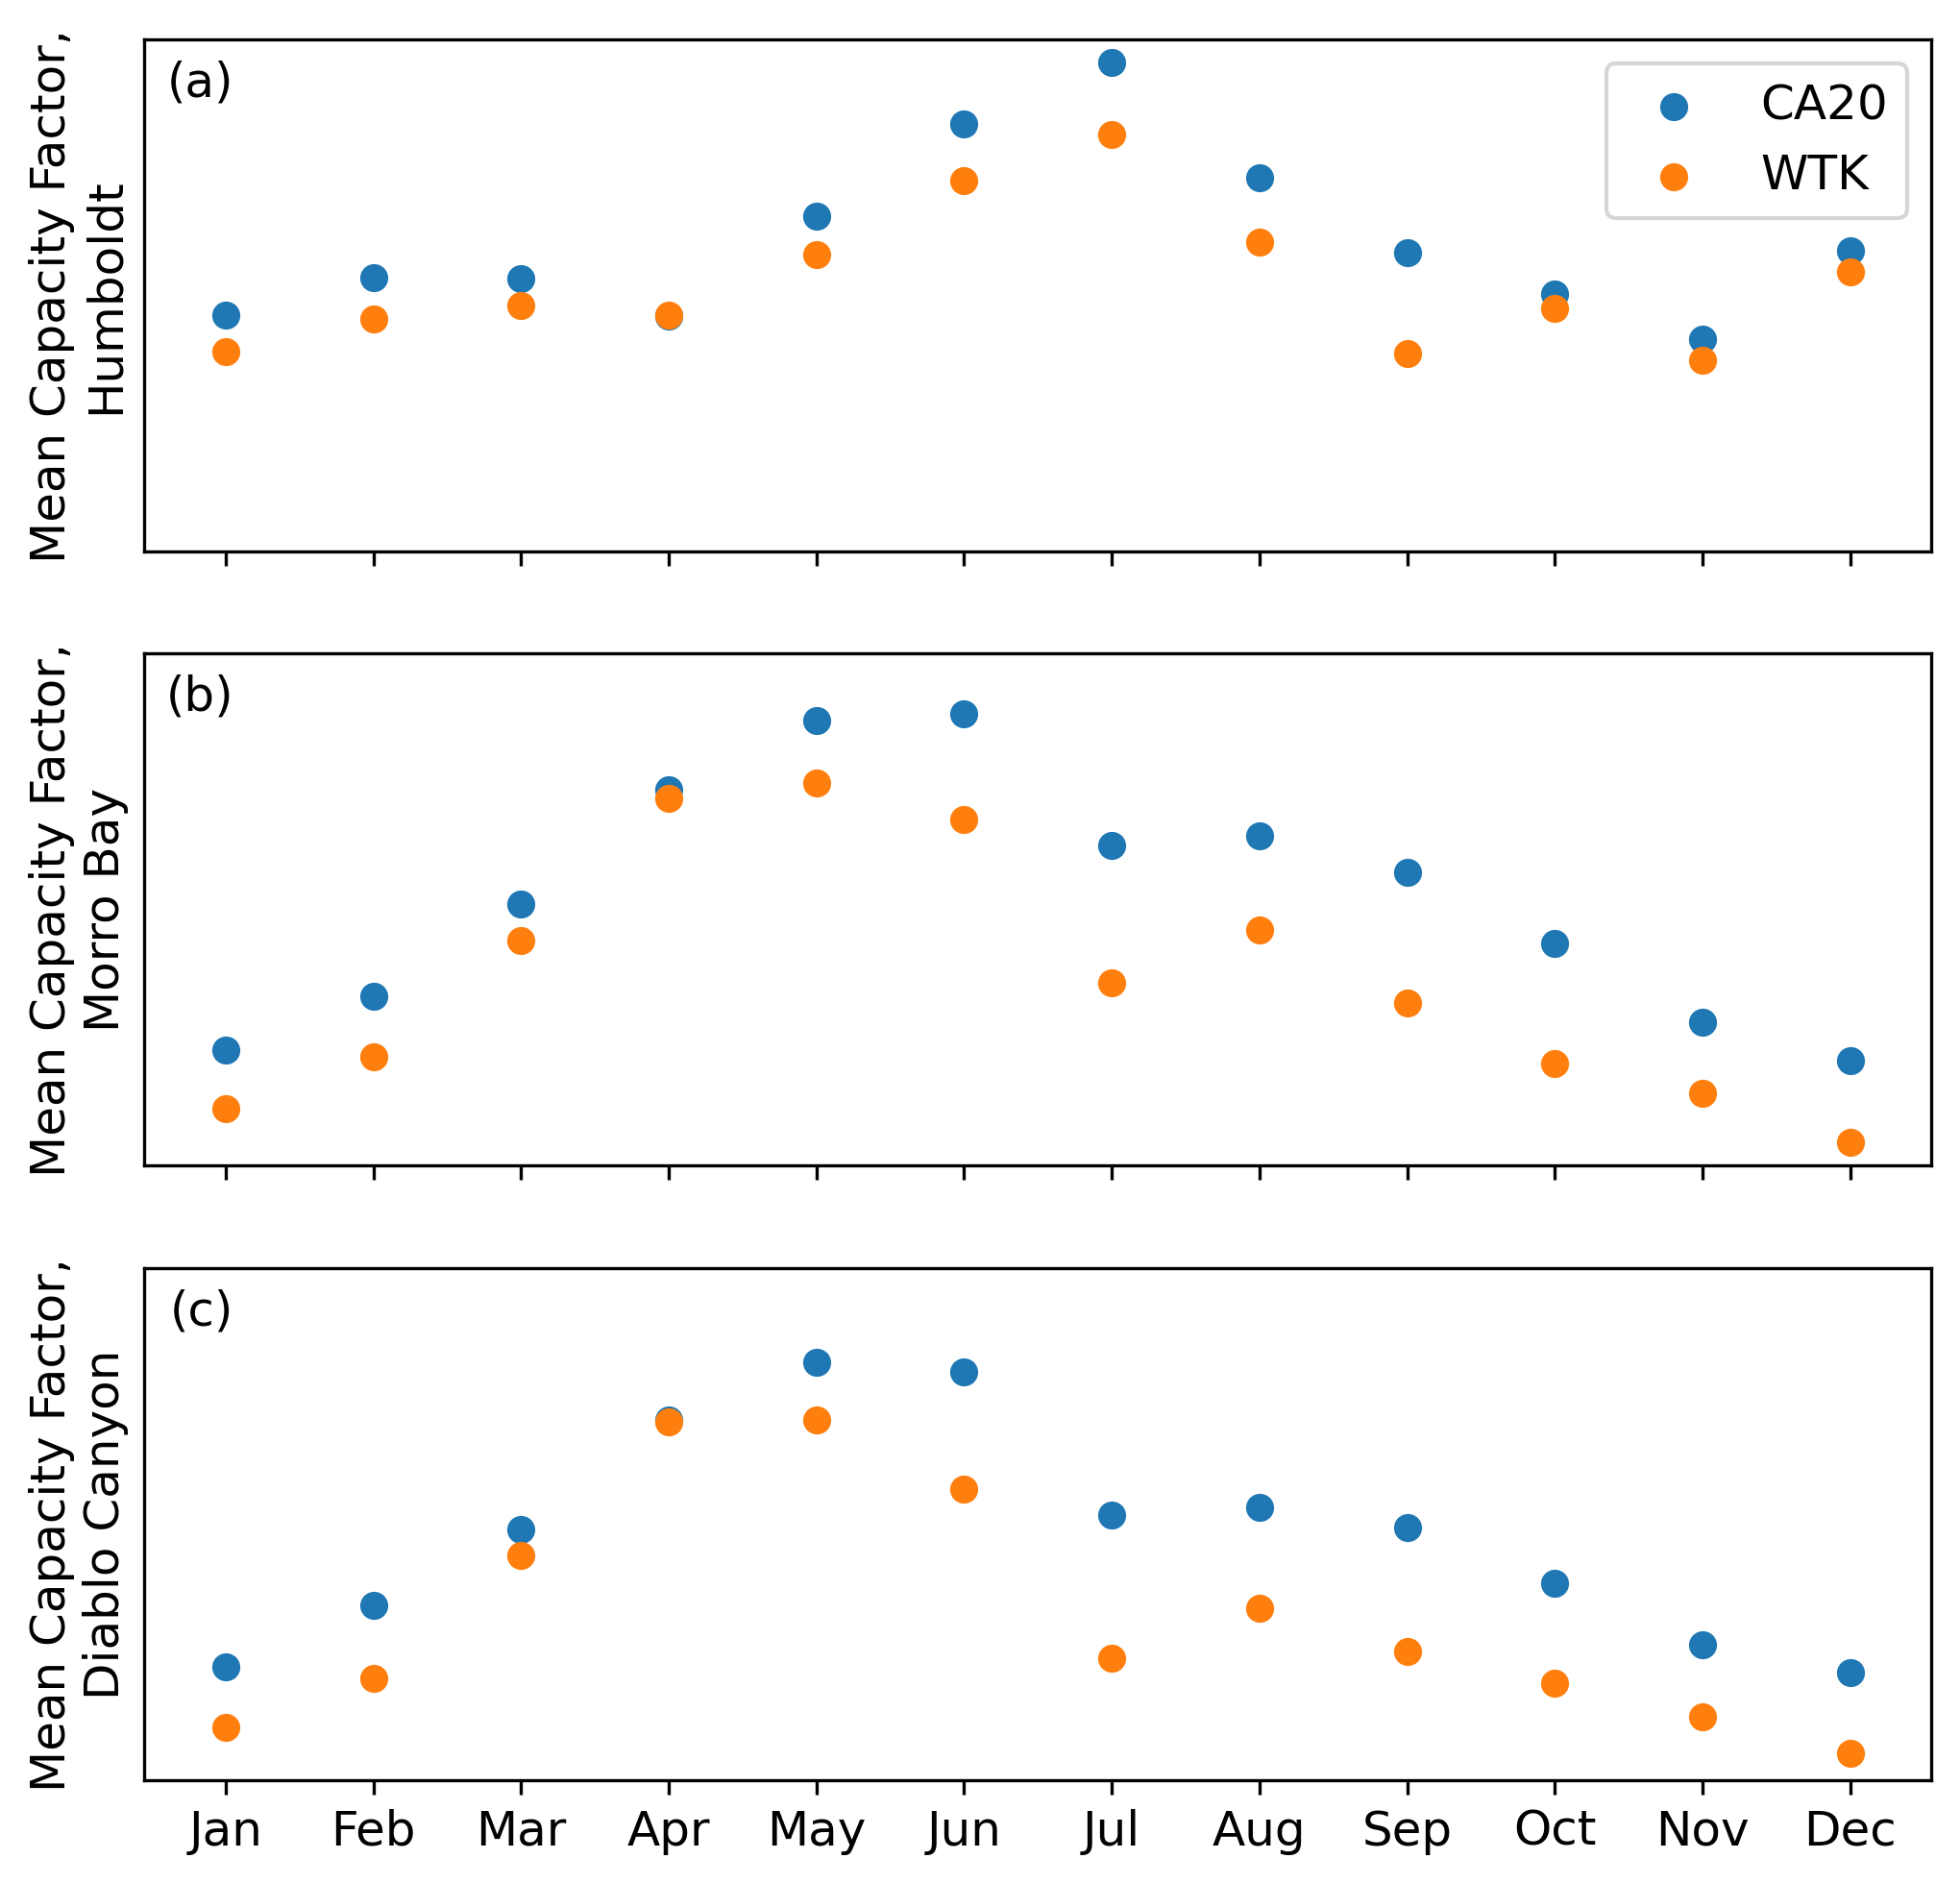

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(8, 8), sharex=True, sharey=True)

ax[0].scatter(capfac_stats_ch.index, capfac_stats_ch['Mean'],
           color='C0', label='CA20')
ax[0].scatter(capfac_stats_wh.index, capfac_stats_wh['Mean'],
           color='C1', label='WTK')
ax[0].set_ylabel('Mean Capacity Factor,\nHumboldt')
ax[0].legend()

ax[1].scatter(capfac_stats_cm.index, capfac_stats_cm['Mean'],
           color='C0', label='CA20')
ax[1].scatter(capfac_stats_wm.index, capfac_stats_wm['Mean'],
           color='C1', label='WTK')
ax[1].set_ylabel('Mean Capacity Factor,\nMorro Bay')

ax[2].scatter(capfac_stats_cd.index, capfac_stats_cd['Mean'],
           color='C0', label='CA20')
ax[2].scatter(capfac_stats_wd.index, capfac_stats_wd['Mean'],
           color='C1', label='WTK')
ax[2].set_ylabel('Mean Capacity Factor,\nDiablo Canyon')
ax[2].set_xticks(np.arange(1,13,1))
ax[2].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

ax[0].axes.get_yaxis().set_ticks([])
ax[1].axes.get_yaxis().set_ticks([])
ax[2].axes.get_yaxis().set_ticks([])

ax[0].text(0.05,
          0.89,
          '(a)',
          fontsize=12,
          transform = ax[0].transAxes,
          horizontalalignment='right',
            color='black')
ax[1].text(0.05,
          0.89,
          '(b)',
          fontsize=12,
          transform = ax[1].transAxes,
          horizontalalignment='right',
            color='black')
ax[2].text(0.05,
          0.89,
          '(c)',
          fontsize=12,
          transform = ax[2].transAxes,
          horizontalalignment='right',
            color='black')

# plt.savefig('../figures/fig11.png', bbox_inches='tight')
# plt.savefig('../figures/fig11.pdf', bbox_inches='tight')

plt.show()

### Veer
We calculate veer as the difference in wind angle between 40 and 200 m, following Nicola's 2019 offshore lidar paper.

In [13]:
### Create dataframe where non-operational wind timesteps are dropped
cutin_thresh = 300
cutout_thresh = 3000

df_ch_filt = df_ch[(df_ch['windspeed_120m']>cutin_thresh) & (df_ch['windspeed_120m']<cutout_thresh)]
df_cd_filt = df_cd[(df_cd['windspeed_120m']>cutin_thresh) & (df_cd['windspeed_120m']<cutout_thresh)]
df_cm_filt = df_cm[(df_cm['windspeed_120m']>cutin_thresh) & (df_cm['windspeed_120m']<cutout_thresh)]

df_wh_filt = df_wh[(df_wh['windspeed_120m']>cutin_thresh) & (df_wh['windspeed_120m']<cutout_thresh)]
df_wd_filt = df_wd[(df_wd['windspeed_120m']>cutin_thresh) & (df_wd['windspeed_120m']<cutout_thresh)]
df_wm_filt = df_wm[(df_wm['windspeed_120m']>cutin_thresh) & (df_wm['windspeed_120m']<cutout_thresh)]

In [14]:
### Calculate veer with 40 m as lower height
height_diff = 200 - 40

## Lower height
theta_ch_low = df_ch_filt['winddirection_40m']/100
theta_cd_low = df_cd_filt['winddirection_40m']/100
theta_cm_low = df_cm_filt['winddirection_40m']/100

theta_wh_low = df_wh_filt['winddirection_40m']/100
theta_wd_low = df_wd_filt['winddirection_40m']/100
theta_wm_low = df_wm_filt['winddirection_40m']/100

## Upper height
theta_ch_high = df_ch_filt['winddirection_200m']/100
theta_cd_high = df_cd_filt['winddirection_200m']/100
theta_cm_high = df_cm_filt['winddirection_200m']/100

theta_wh_high = df_wh_filt['winddirection_200m']/100
theta_wd_high = df_wd_filt['winddirection_200m']/100
theta_wm_high = df_wm_filt['winddirection_200m']/100

## Calculate veer; angle differences between [0, 180]
veer_ch = np.abs(theta_ch_low - theta_ch_high) % 360
veer_ch[veer_ch > 180] = 360 - veer_ch[veer_ch > 180]
clockwise_ch = (theta_ch_low + veer_ch) % 360 == theta_ch_high
veer_ch[~clockwise_ch] *= -1

veer_cd = np.abs(theta_cd_low - theta_cd_high) % 360
veer_cd[veer_cd > 180] = 360 - veer_cd[veer_cd > 180]
clockwise_cd = (theta_cd_low + veer_cd) % 360 == theta_cd_high
veer_cd[~clockwise_cd] *= -1

veer_cm = np.abs(theta_cm_low - theta_cm_high) % 360
veer_cm[veer_cm > 180] = 360 - veer_cm[veer_cm > 180]
clockwise_cm = (theta_cm_low + veer_cm) % 360 == theta_cm_high
veer_cm[~clockwise_cm] *= -1

veer_wh = np.abs(theta_wh_low - theta_wh_high) % 360
veer_wh[veer_wh > 180] = 360 - veer_wh[veer_wh > 180]
clockwise_wh = (theta_wh_low + veer_wh) % 360 == theta_wh_high
veer_wh[~clockwise_wh] *= -1

veer_wd = np.abs(theta_wd_low - theta_wd_high) % 360
veer_wd[veer_wd > 180] = 360 - veer_wd[veer_wd > 180]
clockwise_wd = (theta_wd_low + veer_wd) % 360 == theta_wd_high
veer_wd[~clockwise_wd] *= -1

veer_wm = np.abs(theta_wm_low - theta_wm_high) % 360
veer_wm[veer_wm > 180] = 360 - veer_wm[veer_wm > 180]
clockwise_wm = (theta_wm_low + veer_wm) % 360 == theta_wm_high
veer_wm[~clockwise_wm] *= -1

In [15]:
### Calculate veer with 10m as lower height
height_diff_10m = 200 - 10

## Lower height
theta_ch_low_10m = df_ch_filt['winddirection_10m']/100
theta_cd_low_10m = df_cd_filt['winddirection_10m']/100
theta_cm_low_10m = df_cm_filt['winddirection_10m']/100

theta_wh_low_10m = df_wh_filt['winddirection_10m']/100
theta_wd_low_10m = df_wd_filt['winddirection_10m']/100
theta_wm_low_10m = df_wm_filt['winddirection_10m']/100

## Upper height
theta_ch_high_10m = df_ch_filt['winddirection_200m']/100
theta_cd_high_10m = df_cd_filt['winddirection_200m']/100
theta_cm_high_10m = df_cm_filt['winddirection_200m']/100

theta_wh_high_10m = df_wh_filt['winddirection_200m']/100
theta_wd_high_10m = df_wd_filt['winddirection_200m']/100
theta_wm_high_10m = df_wm_filt['winddirection_200m']/100

## Calculate veer; angle differences between [0, 180]
veer_ch_10m = np.abs(theta_ch_low_10m - theta_ch_high_10m) % 360
veer_ch_10m[veer_ch_10m > 180] = 360 - veer_ch_10m[veer_ch_10m > 180]
clockwise_ch_10m = (theta_ch_low_10m + veer_ch_10m) % 360 == theta_ch_high_10m
veer_ch_10m[~clockwise_ch_10m] *= -1

veer_cd_10m = np.abs(theta_cd_low_10m - theta_cd_high_10m) % 360
veer_cd_10m[veer_cd_10m > 180] = 360 - veer_cd_10m[veer_cd_10m > 180]
clockwise_cd_10m = (theta_cd_low_10m + veer_cd_10m) % 360 == theta_cd_high_10m
veer_cd_10m[~clockwise_cd_10m] *= -1

veer_cm_10m = np.abs(theta_cm_low_10m - theta_cm_high_10m) % 360
veer_cm_10m[veer_cm_10m > 180] = 360 - veer_cm_10m[veer_cm_10m > 180]
clockwise_cm_10m = (theta_cm_low_10m + veer_cm_10m) % 360 == theta_cm_high_10m
veer_cm_10m[~clockwise_cm_10m]*= -1

veer_wh_10m = np.abs(theta_wh_low_10m - theta_wh_high_10m) % 360
veer_wh_10m[veer_wh_10m > 180] = 360 - veer_wh_10m[veer_wh_10m > 180]
clockwise_wh_10m = (theta_wh_low_10m + veer_wh_10m) % 360 == theta_wh_high_10m
veer_wh_10m[~clockwise_wh_10m] *= -1

veer_wd_10m = np.abs(theta_wd_low_10m - theta_wd_high_10m) % 360
veer_wd_10m[veer_wd_10m > 180] = 360 - veer_wd_10m[veer_wd_10m > 180]
clockwise_wd_10m = (theta_wd_low_10m + veer_wd_10m) % 360 == theta_wd_high_10m
veer_wd_10m[~clockwise_wd_10m] *= -1

veer_wm_10m = np.abs(theta_wm_low_10m - theta_wm_high_10m) % 360
veer_wm_10m[veer_wm_10m > 180] = 360 - veer_wm_10m[veer_wm_10m > 180]
clockwise_wm_10m = (theta_wm_low_10m + veer_wm_10m) % 360 == theta_wm_high_10m
veer_wm_10m[~clockwise_wm_10m] *= -1

In [16]:
### Calculate veer histograms
## Parameters
theta_bins = np.arange(-0.1, 0.3, 0.0025)

## CA20
veer_ch_hist_np = np.histogram(veer_ch / height_diff,
             bins=theta_bins)
veer_cd_hist_np = np.histogram(veer_cd / height_diff,
             bins=theta_bins)
veer_cm_hist_np = np.histogram(veer_cm / height_diff,
             bins=theta_bins)
veer_ch_hist = scipy.stats.rv_histogram(veer_ch_hist_np)
veer_cd_hist = scipy.stats.rv_histogram(veer_cd_hist_np)
veer_cm_hist = scipy.stats.rv_histogram(veer_cm_hist_np)

## WTK
veer_wh_hist_np = np.histogram(veer_wh / height_diff,
             bins=theta_bins)
veer_wd_hist_np = np.histogram(veer_wd / height_diff,
             bins=theta_bins)
veer_wm_hist_np = np.histogram(veer_wm / height_diff,
             bins=theta_bins)
veer_wh_hist = scipy.stats.rv_histogram(veer_wh_hist_np)
veer_wd_hist = scipy.stats.rv_histogram(veer_wd_hist_np)
veer_wm_hist = scipy.stats.rv_histogram(veer_wm_hist_np)

## CA20 - 10 m 
veer_ch_hist_np_10m = np.histogram(veer_ch_10m / height_diff_10m,
             bins=theta_bins)
veer_cd_hist_np_10m = np.histogram(veer_cd_10m / height_diff_10m,
             bins=theta_bins)
veer_cm_hist_np_10m = np.histogram(veer_cm_10m / height_diff_10m,
             bins=theta_bins)
veer_ch_hist_10m = scipy.stats.rv_histogram(veer_ch_hist_np_10m)
veer_cd_hist_10m = scipy.stats.rv_histogram(veer_cd_hist_np_10m)
veer_cm_hist_10m = scipy.stats.rv_histogram(veer_cm_hist_np_10m)

## WTK - 10 m
veer_wh_hist_np_10m = np.histogram(veer_wh_10m / height_diff_10m,
             bins=theta_bins)
veer_wd_hist_np_10m = np.histogram(veer_wd_10m / height_diff_10m,
             bins=theta_bins)
veer_wm_hist_np_10m = np.histogram(veer_wm_10m / height_diff_10m,
             bins=theta_bins)
veer_wh_hist_10m = scipy.stats.rv_histogram(veer_wh_hist_np_10m)
veer_wd_hist_10m = scipy.stats.rv_histogram(veer_wd_hist_np_10m)
veer_wm_hist_10m = scipy.stats.rv_histogram(veer_wm_hist_np_10m)

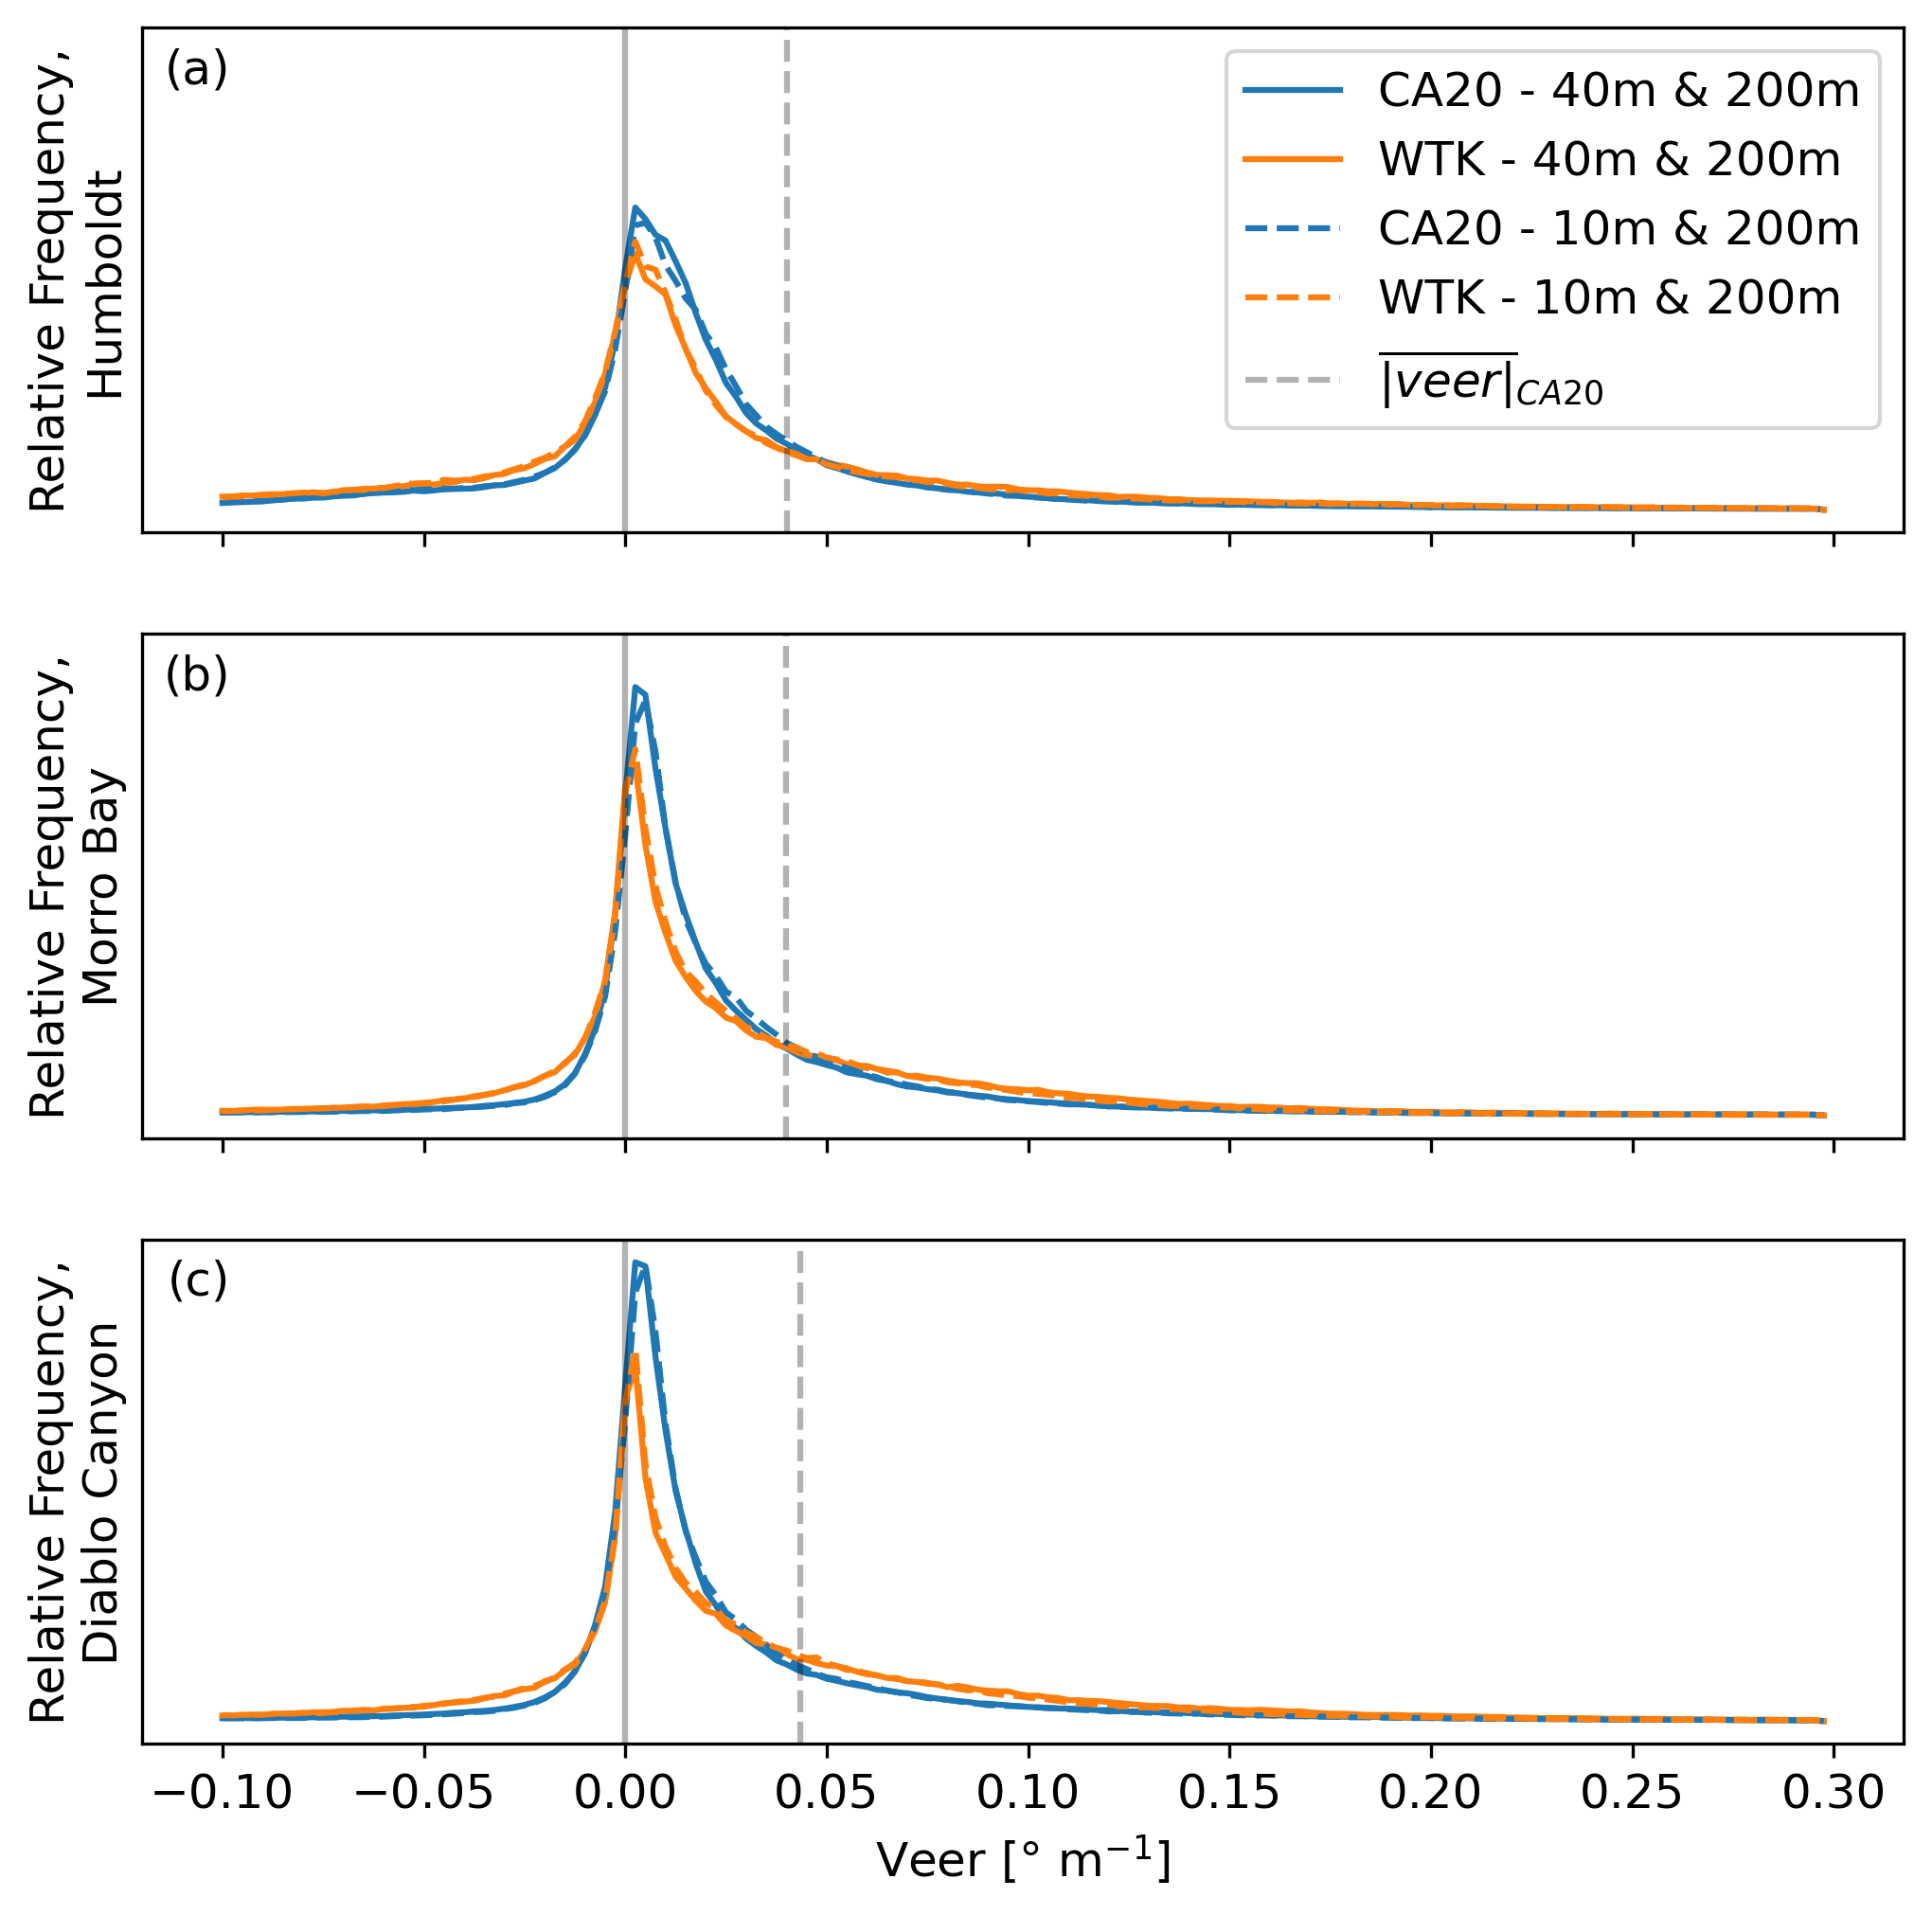

In [17]:
fig, ax = plt.subplots(3, 1, figsize=(8, 8), sharex=True, sharey=True)

ax[0].plot(theta_bins, veer_ch_hist.pdf(theta_bins),
           color='C0', ls='-', label='CA20 - 40m & 200m')
ax[0].plot(theta_bins, veer_wh_hist.pdf(theta_bins),
           color='C1', ls='-', label='WTK - 40m & 200m')
ax[0].plot(theta_bins, veer_ch_hist_10m.pdf(theta_bins),
           color='C0', ls='--', label='CA20 - 10m & 200m')
ax[0].plot(theta_bins, veer_wh_hist_10m.pdf(theta_bins),
           color='C1', ls='--', label='WTK - 10m & 200m')
ax[0].axvline(0, color='k', alpha=0.3)
ax[0].axvline(veer_ch.abs().mean()/height_diff, color='k', ls='--', alpha=0.3, label='$\overline{|veer|}_{CA20}$')
ax[0].set_ylabel('Relative Frequency,\nHumboldt')
ax[0].legend()

ax[1].plot(theta_bins, veer_cm_hist.pdf(theta_bins),
           color='C0', ls='-')
ax[1].plot(theta_bins, veer_wm_hist.pdf(theta_bins),
           color='C1', ls='-')
ax[1].plot(theta_bins, veer_cm_hist_10m.pdf(theta_bins),
           color='C0', ls='--')
ax[1].plot(theta_bins, veer_wm_hist_10m.pdf(theta_bins),
           color='C1', ls='--')
ax[1].set_ylabel('Relative Frequency,\nMorro Bay')
ax[1].axvline(0, color='k', alpha=0.3)
ax[1].axvline(veer_cm.abs().mean()/height_diff, color='k', ls='--', alpha=0.3)

ax[2].plot(theta_bins, veer_cd_hist.pdf(theta_bins),
           color='C0', ls='-')
ax[2].plot(theta_bins, veer_wd_hist.pdf(theta_bins),
           color='C1', ls='-')
ax[2].plot(theta_bins, veer_cd_hist_10m.pdf(theta_bins),
           color='C0', ls='--')
ax[2].plot(theta_bins, veer_wd_hist_10m.pdf(theta_bins),
           color='C1', ls='--')
ax[2].axvline(0, color='k', alpha=0.3)
ax[2].axvline(veer_cd.abs().mean()/height_diff, color='k', ls='--', alpha=0.3)
ax[2].set_ylabel('Relative Frequency,\nDiablo Canyon')
ax[-1].set_xlabel('Veer [$\degree$ m$^{-1}$]')

ax[0].axes.get_yaxis().set_ticks([])
ax[1].axes.get_yaxis().set_ticks([])
ax[2].axes.get_yaxis().set_ticks([])

ax[0].text(0.05,
          0.89,
          '(a)',
          fontsize=12,
          transform = ax[0].transAxes,
          horizontalalignment='right',
            color='black')
ax[1].text(0.05,
          0.89,
          '(b)',
          fontsize=12,
          transform = ax[1].transAxes,
          horizontalalignment='right',
            color='black')
ax[2].text(0.05,
          0.89,
          '(c)',
          fontsize=12,
          transform = ax[2].transAxes,
          horizontalalignment='right',
            color='black')

# plt.savefig('../figures/fig15.png', bbox_inches='tight')
# plt.savefig('../figures/fig15.pdf', bbox_inches='tight')

plt.show()

### Shear
Characterize shear using the $\alpha$ parameter

In [18]:
### Characterize shear
alpha_ch = np.log(df_ch_filt['windspeed_200m']/df_ch_filt['windspeed_40m']) / np.log(200 / 40)
alpha_cd = np.log(df_cd_filt['windspeed_200m']/df_cd_filt['windspeed_40m']) / np.log(200 / 40)
alpha_cm = np.log(df_cm_filt['windspeed_200m']/df_cm_filt['windspeed_40m']) / np.log(200 / 40)

alpha_wh = np.log(df_wh_filt['windspeed_200m']/df_wh_filt['windspeed_40m']) / np.log(200 / 40)
alpha_wd = np.log(df_wd_filt['windspeed_200m']/df_wd_filt['windspeed_40m']) / np.log(200 / 40)
alpha_wm = np.log(df_wm_filt['windspeed_200m']/df_wm_filt['windspeed_40m']) / np.log(200 / 40)

## Does a 10-m lower boundary change much?
alpha_ch_10m = np.log(df_ch_filt['windspeed_200m']/df_ch_filt['windspeed_10m']) / np.log(200 / 10)
alpha_cd_10m = np.log(df_cd_filt['windspeed_200m']/df_cd_filt['windspeed_10m']) / np.log(200 / 10)
alpha_cm_10m = np.log(df_cm_filt['windspeed_200m']/df_cm_filt['windspeed_10m']) / np.log(200 / 10)

alpha_wh_10m = np.log(df_wh_filt['windspeed_200m']/df_wh_filt['windspeed_10m']) / np.log(200 / 10)
alpha_wd_10m = np.log(df_wd_filt['windspeed_200m']/df_wd_filt['windspeed_10m']) / np.log(200 / 10)
alpha_wm_10m = np.log(df_wm_filt['windspeed_200m']/df_wm_filt['windspeed_10m']) / np.log(200 / 10)

In [19]:
### Calculate veer histograms
## Parameters
shear_bins = np.arange(-0.2, 0.6, 0.0025)

## CA20
shear_ch_hist_np = np.histogram(alpha_ch,
             bins=shear_bins)
shear_cd_hist_np = np.histogram(alpha_cd,
             bins=shear_bins)
shear_cm_hist_np = np.histogram(alpha_cm,
             bins=shear_bins)
shear_ch_hist = scipy.stats.rv_histogram(shear_ch_hist_np)
shear_cd_hist = scipy.stats.rv_histogram(shear_cd_hist_np)
shear_cm_hist = scipy.stats.rv_histogram(shear_cm_hist_np)

## WTK
shear_wh_hist_np = np.histogram(alpha_wh,
             bins=shear_bins)
shear_wd_hist_np = np.histogram(alpha_wd,
             bins=shear_bins)
shear_wm_hist_np = np.histogram(alpha_wm,
             bins=shear_bins)
shear_wh_hist = scipy.stats.rv_histogram(shear_wh_hist_np)
shear_wd_hist = scipy.stats.rv_histogram(shear_wd_hist_np)
shear_wm_hist = scipy.stats.rv_histogram(shear_wm_hist_np)

## CA20 - 10m
shear_ch_hist_np_10m = np.histogram(alpha_ch_10m,
             bins=shear_bins)
shear_cd_hist_np_10m = np.histogram(alpha_cd_10m,
             bins=shear_bins)
shear_cm_hist_np_10m = np.histogram(alpha_cm_10m,
             bins=shear_bins)
shear_ch_hist_10m = scipy.stats.rv_histogram(shear_ch_hist_np_10m)
shear_cd_hist_10m = scipy.stats.rv_histogram(shear_cd_hist_np_10m)
shear_cm_hist_10m = scipy.stats.rv_histogram(shear_cm_hist_np_10m)

## WTK - 10m
shear_wh_hist_np_10m = np.histogram(alpha_wh_10m,
             bins=shear_bins)
shear_wd_hist_np_10m = np.histogram(alpha_wd_10m,
             bins=shear_bins)
shear_wm_hist_np_10m = np.histogram(alpha_wm_10m,
             bins=shear_bins)
shear_wh_hist_10m = scipy.stats.rv_histogram(shear_wh_hist_np_10m)
shear_wd_hist_10m = scipy.stats.rv_histogram(shear_wd_hist_np_10m)
shear_wm_hist_10m = scipy.stats.rv_histogram(shear_wm_hist_np_10m)

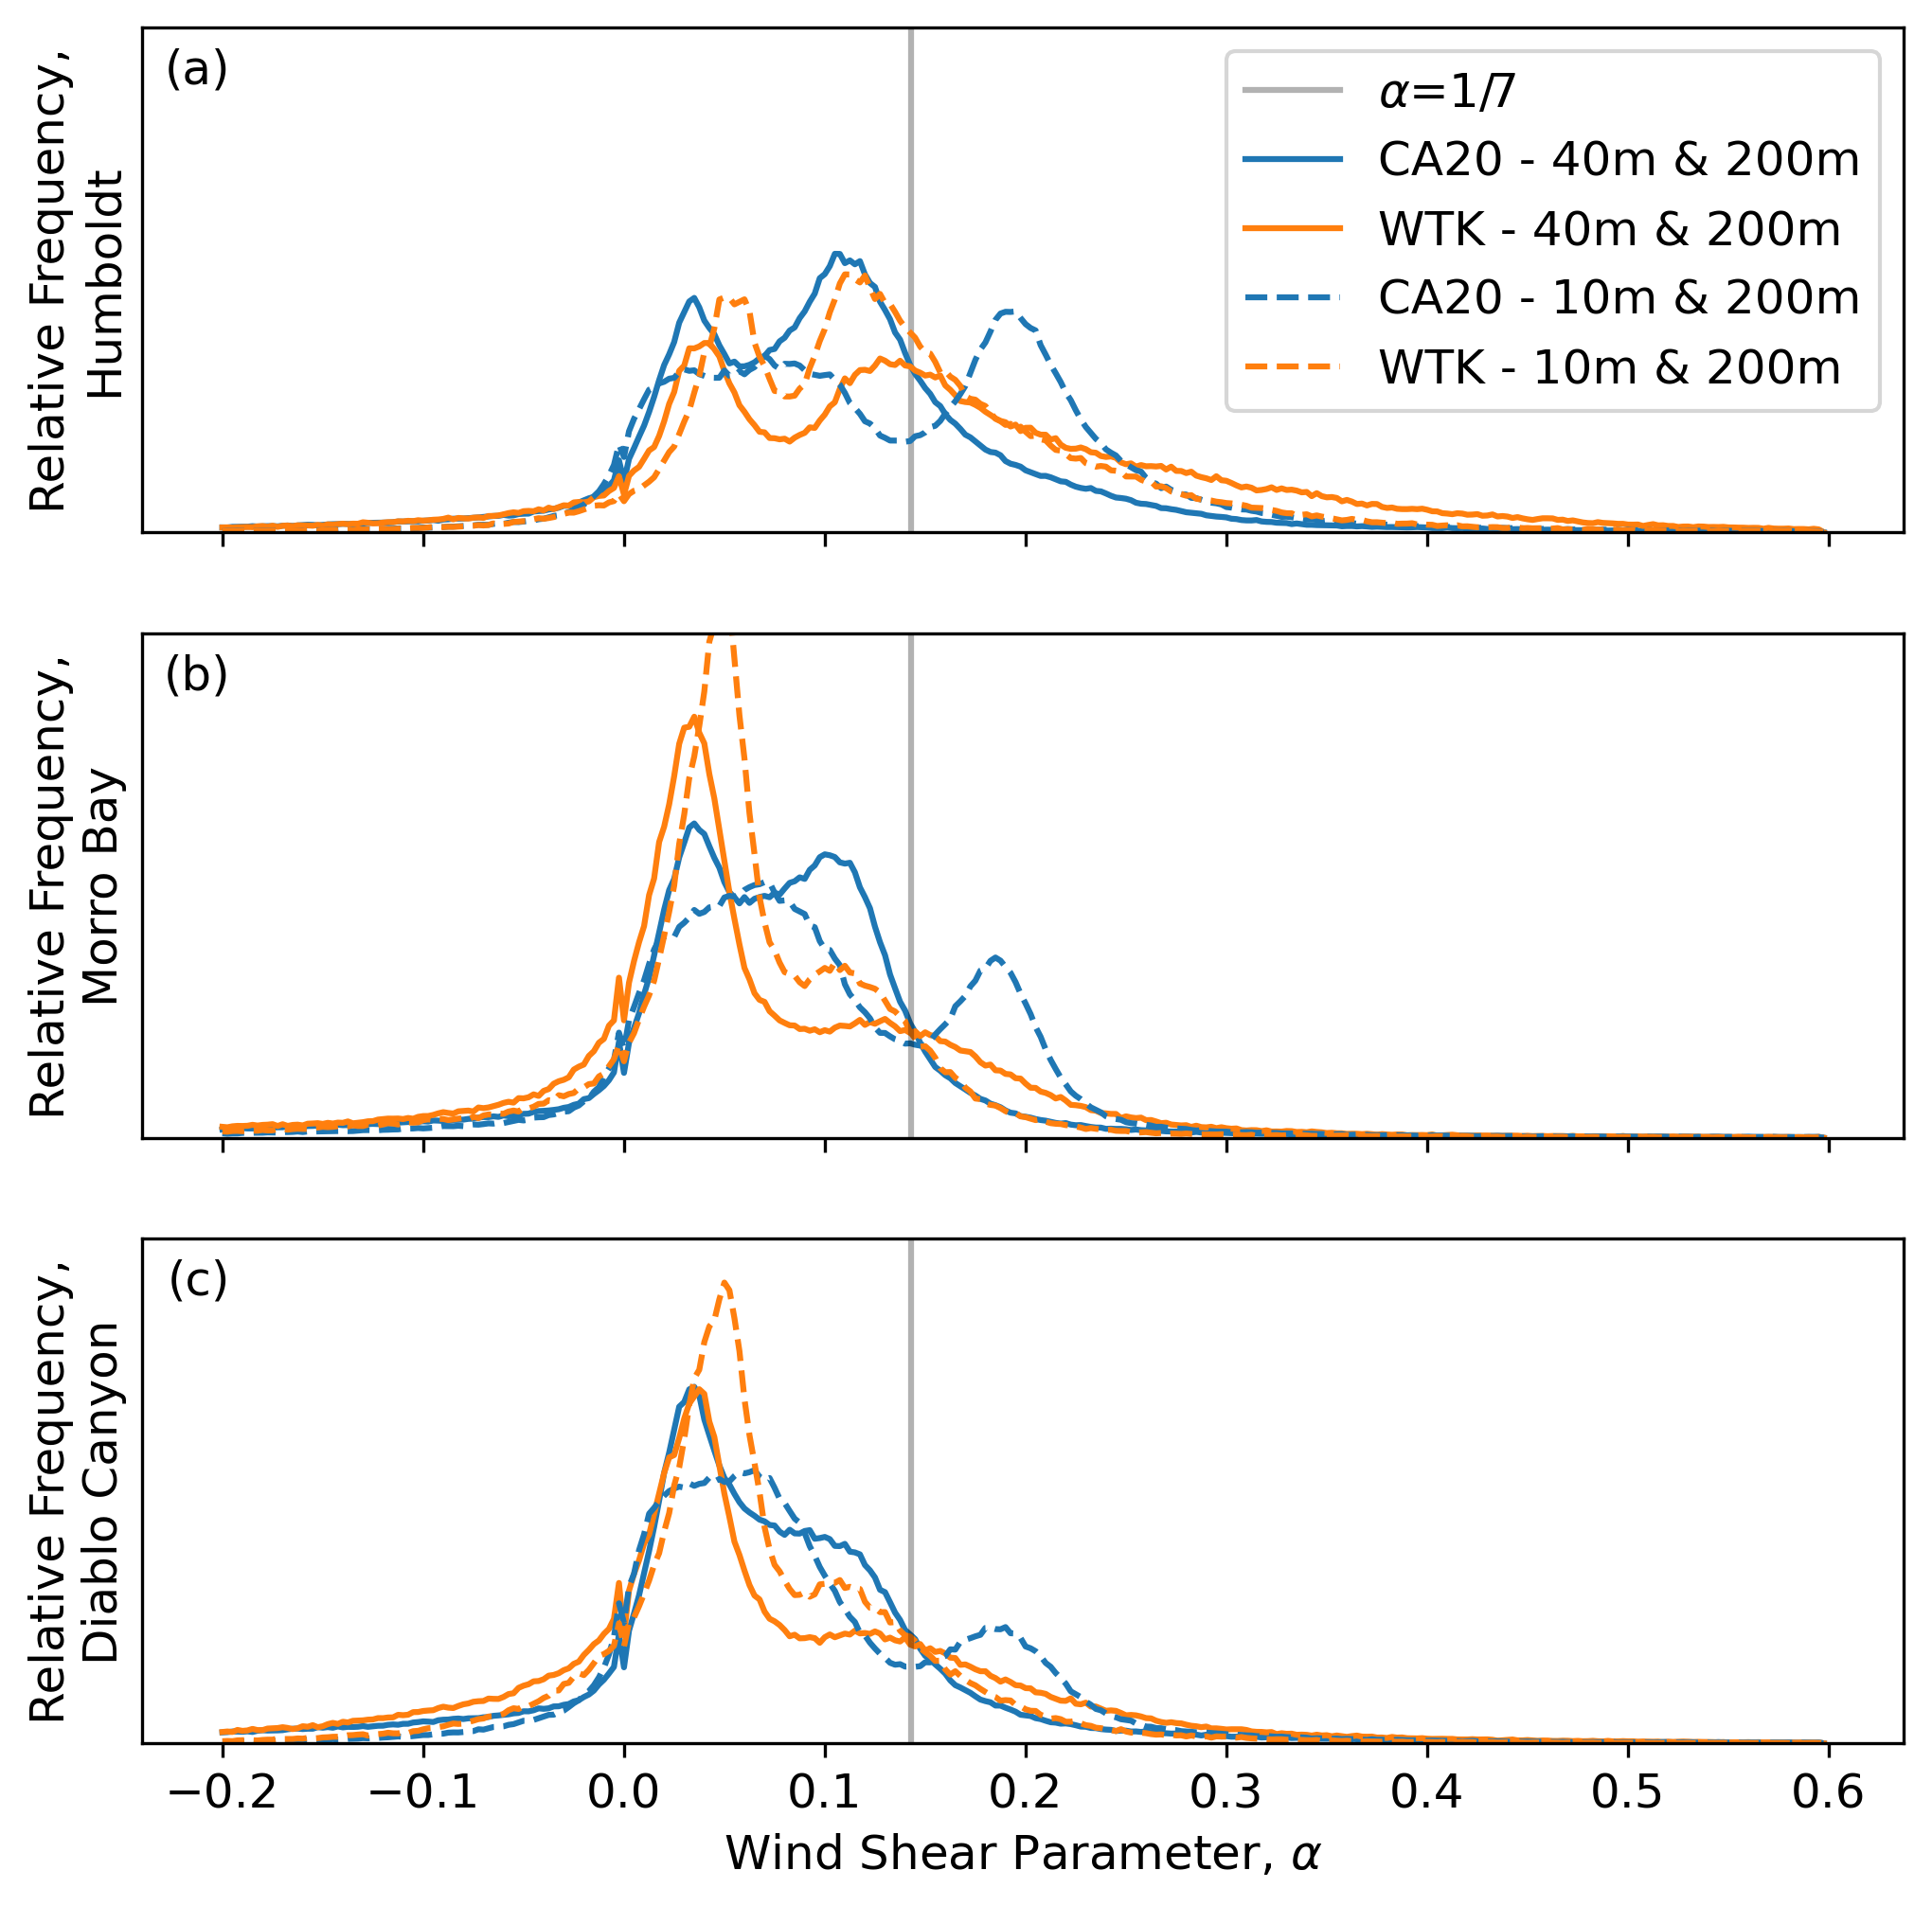

In [20]:
fig, ax = plt.subplots(3, 1, figsize=(8, 8), sharex=True, sharey=True)

ax[0].axvline(1/7, color='k', alpha=0.3, label='$\\alpha$=1/7')
ax[0].plot(shear_bins, shear_ch_hist.pdf(shear_bins),
           color='C0', ls='-', label='CA20 - 40m & 200m')
ax[0].plot(shear_bins, shear_wh_hist.pdf(shear_bins),
           color='C1', ls='-', label='WTK - 40m & 200m')
ax[0].plot(shear_bins, shear_ch_hist_10m.pdf(shear_bins),
           color='C0', ls='--', label='CA20 - 10m & 200m')
ax[0].plot(shear_bins, shear_wh_hist_10m.pdf(shear_bins),
           color='C1', ls='--', label='WTK - 10m & 200m')
ax[0].set_ylim(0,12)
ax[0].set_ylabel('Relative Frequency,\nHumboldt')
ax[0].legend()

ax[1].plot(shear_bins, shear_cm_hist.pdf(shear_bins),
           color='C0', ls='-')
ax[1].plot(shear_bins, shear_wm_hist.pdf(shear_bins),
           color='C1', ls='-')
ax[1].plot(shear_bins, shear_cm_hist_10m.pdf(shear_bins),
           color='C0', ls='--')
ax[1].plot(shear_bins, shear_wm_hist_10m.pdf(shear_bins),
           color='C1', ls='--')
ax[1].set_ylabel('Relative Frequency,\nMorro Bay')
ax[1].axvline(1/7, color='k', alpha=0.3)

ax[2].plot(shear_bins, shear_cd_hist.pdf(shear_bins),
           color='C0', ls='-')
ax[2].plot(shear_bins, shear_wd_hist.pdf(shear_bins),
           color='C1', ls='-')
ax[2].plot(shear_bins, shear_cd_hist_10m.pdf(shear_bins),
           color='C0', ls='--')
ax[2].plot(shear_bins, shear_wd_hist_10m.pdf(shear_bins),
           color='C1', ls='--')
ax[2].set_ylabel('Relative Frequency,\nDiablo Canyon')
ax[2].axvline(1/7, color='k', alpha=0.3)
ax[-1].set_xlabel('Wind Shear Parameter, $\\alpha$')

ax[0].axes.get_yaxis().set_ticks([])
ax[1].axes.get_yaxis().set_ticks([])
ax[2].axes.get_yaxis().set_ticks([])

ax[0].text(0.05,
          0.89,
          '(a)',
          fontsize=12,
          transform = ax[0].transAxes,
          horizontalalignment='right',
            color='black')
ax[1].text(0.05,
          0.89,
          '(b)',
          fontsize=12,
          transform = ax[1].transAxes,
          horizontalalignment='right',
            color='black')
ax[2].text(0.05,
          0.89,
          '(c)',
          fontsize=12,
          transform = ax[2].transAxes,
          horizontalalignment='right',
            color='black')

# plt.savefig('../figures/fig13.png', bbox_inches='tight')
# plt.savefig('../figures/fig13.pdf', bbox_inches='tight')

plt.show()

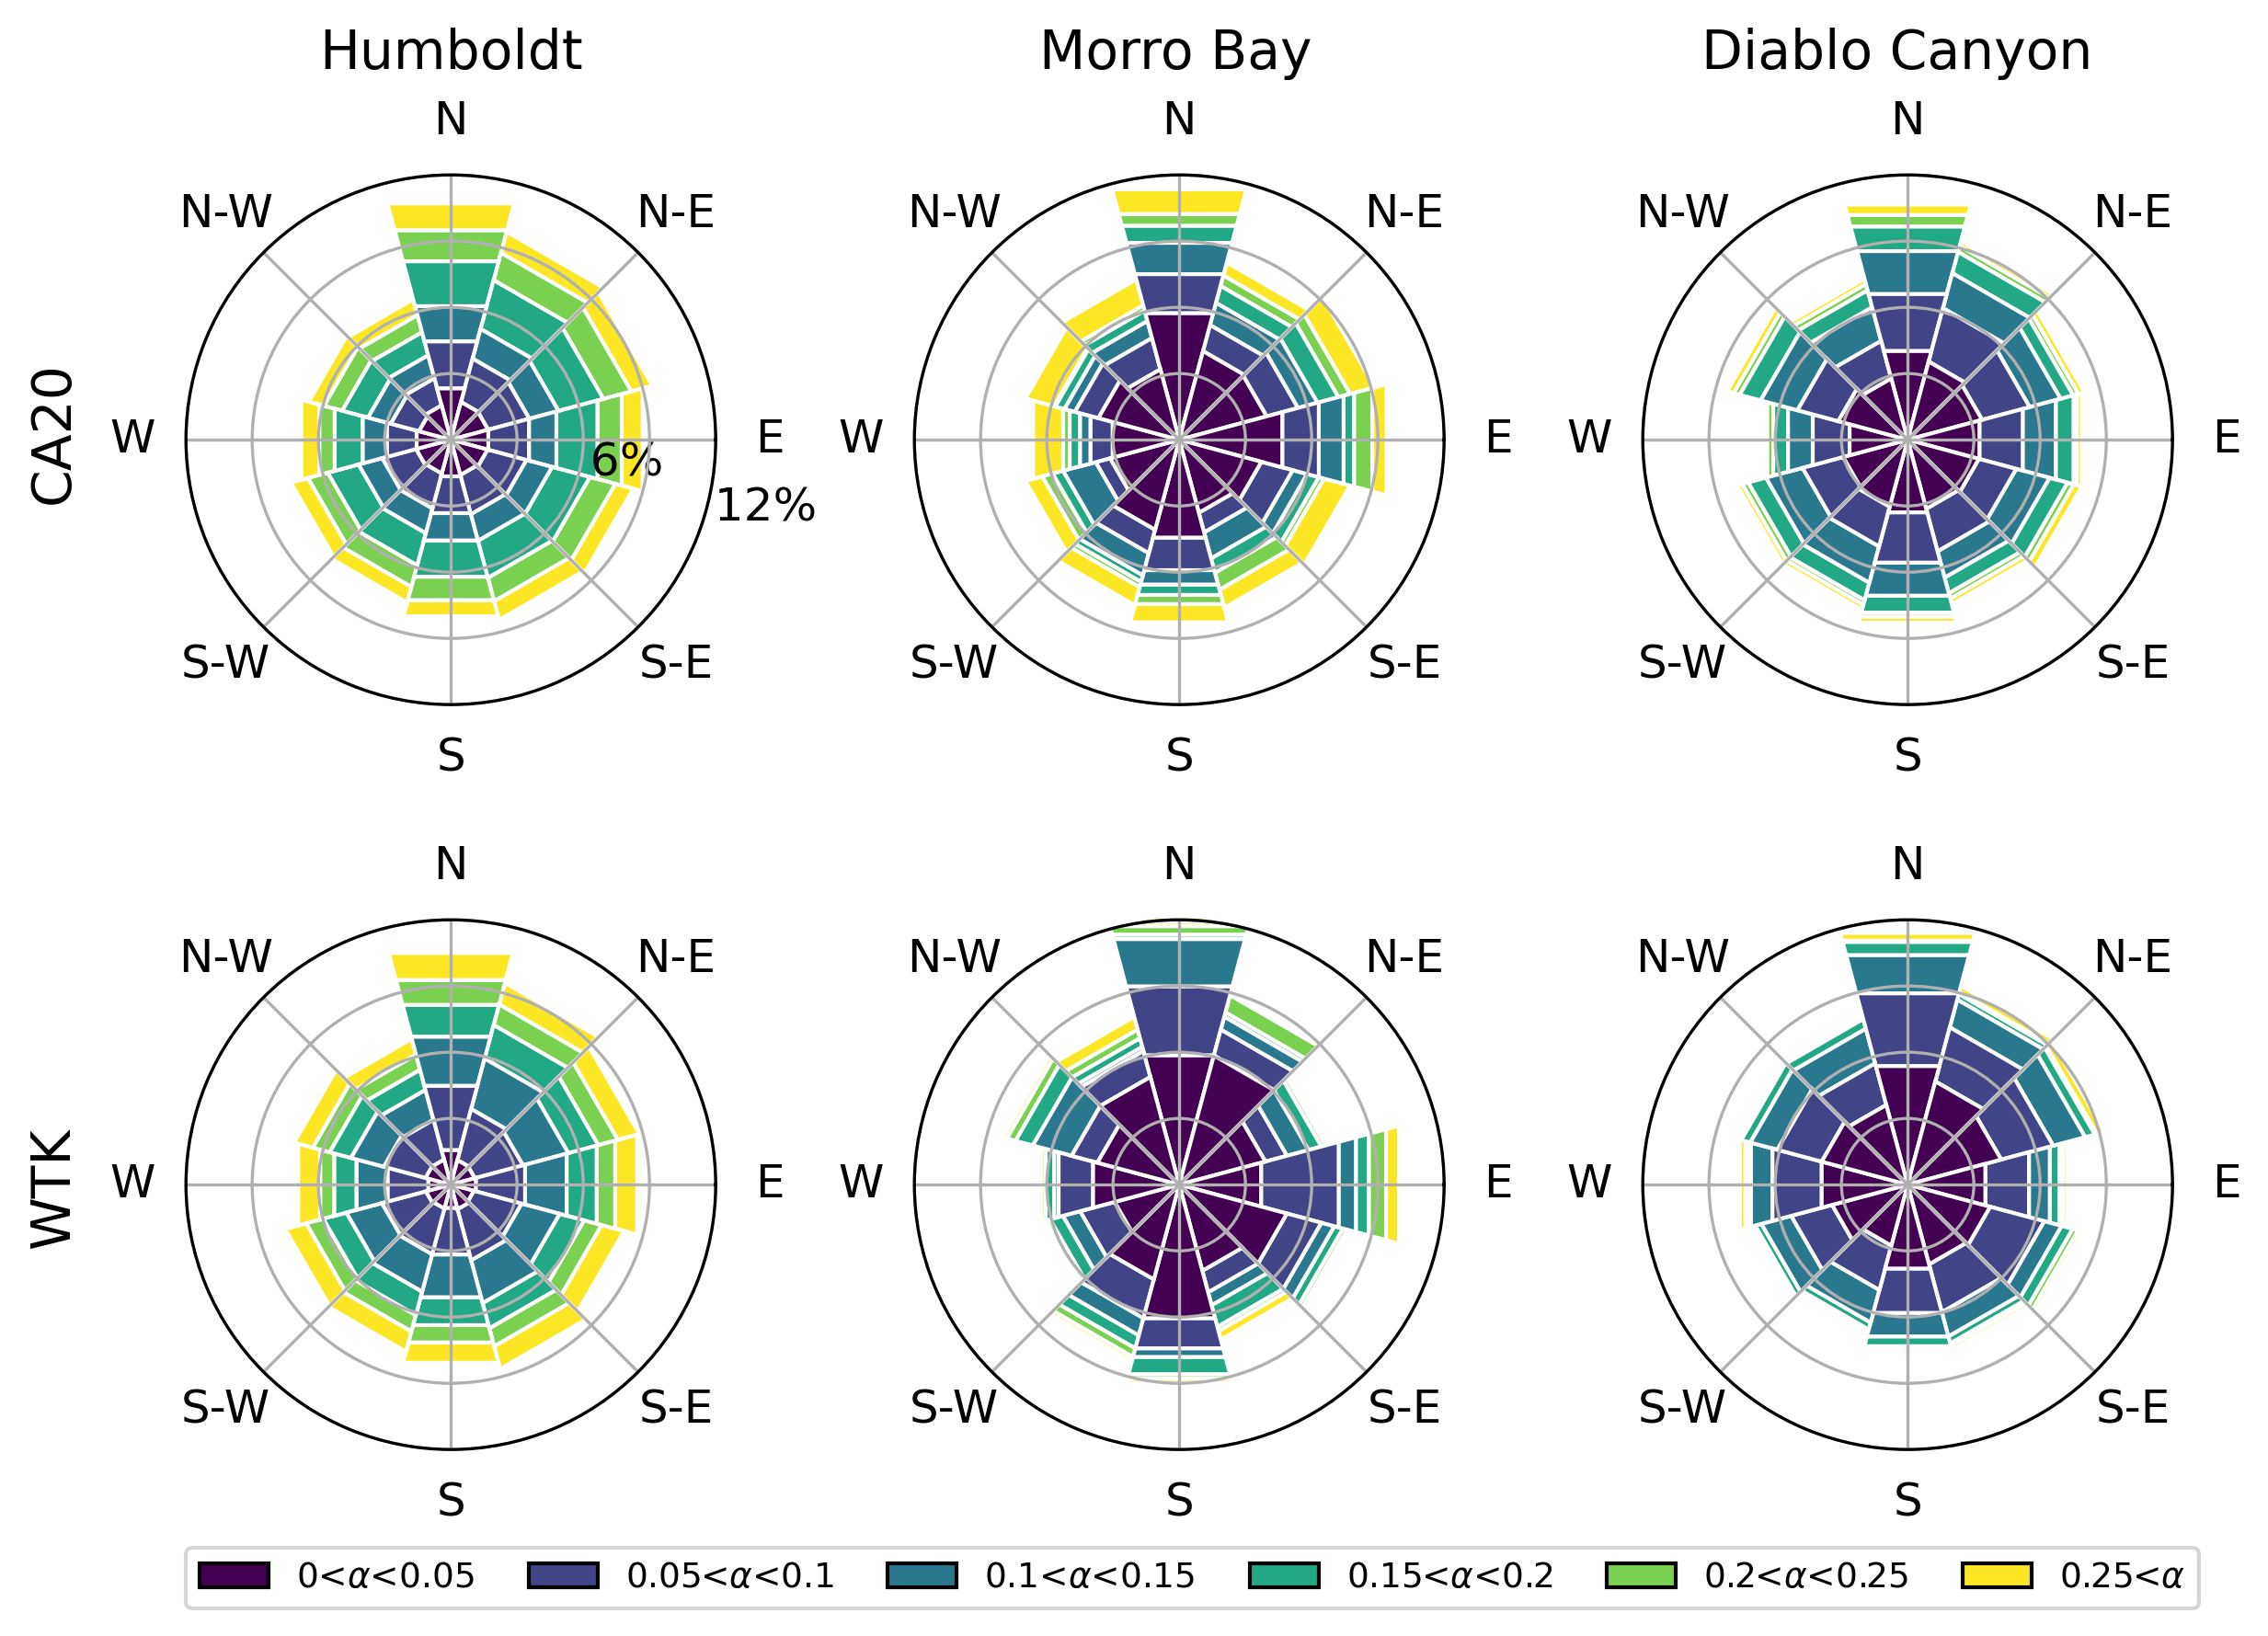

In [21]:
### Plot wind roses
## Set up figure and subplots
##     https://stackoverflow.com/questions/42733194/subplot-of-windrose-in-matplotlib
fig = plt.figure(figsize=[8,6])
rect1 = [0,0,0.32,0.32] 
ax1 = WindroseAxes(fig, rect1)
fig.add_axes(ax1)

rect2 = [0,0.45,0.32,0.32] 
ax2 = WindroseAxes(fig, rect2)
fig.add_axes(ax2)

rect3 = [0.33,0,0.32,0.32] 
ax3 = WindroseAxes(fig, rect3)
fig.add_axes(ax3)

rect4 = [0.33,0.45,0.32,0.32] 
ax4 = WindroseAxes(fig, rect4)
fig.add_axes(ax4)

rect5 = [0.66,0,0.32,0.32] 
ax5 = WindroseAxes(fig, rect5)
fig.add_axes(ax5)

rect6 = [0.66,0.45,0.32,0.32] 
ax6 = WindroseAxes(fig, rect6)
fig.add_axes(ax6)

## Font sizes
cb_fs = 18
lb_fs = 18
tk_fs = 14
bx_fs = 20

## Plot roses (using Mike and Nicola's code)
bins = np.arange(0,0.3,0.05)
ax1.bar(df_wh_filt['winddirection_100m'], alpha_wh_10m, cmap=cm.viridis, normed=True, 
           nsector=12, bins=bins, opening=1, edgecolor='white') # the main plot function
ax2.bar(df_ch_filt['winddirection_100m'], alpha_ch_10m, cmap=cm.viridis, normed=True, 
           nsector=12, bins=bins, opening=1, edgecolor='white') # the main plot function
ax3.bar(df_wm_filt['winddirection_100m'], alpha_wm_10m, cmap=cm.viridis, normed=True, 
           nsector=12, bins=bins, opening=1, edgecolor='white') # the main plot function
ax4.bar(df_cm_filt['winddirection_100m'], alpha_cm_10m, cmap=cm.viridis, normed=True, 
           nsector=12, bins=bins, opening=1, edgecolor='white') # the main plot function
ax5.bar(df_wd_filt['winddirection_100m'], alpha_wd_10m, cmap=cm.viridis, normed=True, 
           nsector=12, bins=bins, opening=1, edgecolor='white') # the main plot function
ax6.bar(df_cd_filt['winddirection_100m'], alpha_cd_10m, cmap=cm.viridis, normed=True, 
           nsector=12, bins=bins, opening=1, edgecolor='white') # the main plot function


## Set radial tick labels
ax1.set_rmax(12) # max percentage (external circle)
ax1.set_rticks(np.arange(3,15,3)) # internal circles
ax1.set_yticklabels(['','','',''])


ax2.set_rlabel_position(340) #degrees
ax2.set_rmax(12) # max percentage (external circle)
ax2.set_rticks(np.arange(3,15,3)) # internal circles
ax2.set_yticklabels(['',' 6%','',' 12%'], fontsize=tk_fs-2)

ax3.set_rmax(12) # max percentage (external circle)
ax3.set_rticks(np.arange(3,15,3)) # internal circles
ax3.set_yticklabels(['','','',''])

ax4.set_rmax(12) # max percentage (external circle)
ax4.set_rticks(np.arange(3,15,3)) # internal circles
ax4.set_yticklabels(['','','',''])

ax5.set_rmax(12) # max percentage (external circle)
ax5.set_rticks(np.arange(3,15,3)) # internal circles
ax5.set_yticklabels(['','','',''])

ax6.set_rmax(12) # max percentage (external circle)
ax6.set_rticks(np.arange(3,15,3)) # internal circles
ax6.set_yticklabels(['','','',''])


## Legend
leg = ax1.legend(bbox_to_anchor=(0., -0.3, 3.8, .102),
                    loc='lower left',
                    ncol=6,
                    mode='expand',
                    borderaxespad=0.,
                    fontsize=9)
leg.get_texts()[0].set_text('0<$\\alpha$<0.05')
leg.get_texts()[1].set_text('0.05<$\\alpha$<0.1')
leg.get_texts()[2].set_text('0.1<$\\alpha$<0.15')
leg.get_texts()[3].set_text('0.15<$\\alpha$<0.2')
leg.get_texts()[4].set_text('0.2<$\\alpha$<0.25')
leg.get_texts()[5].set_text('0.25<$\\alpha$')

## Label areas
ax2.text(0.75,
          1.20,
          'Humboldt',
          fontsize=14,
          transform = ax2.transAxes,
          horizontalalignment='right')
ax4.text(0.75,
          1.20,
          'Morro Bay',
          fontsize=14,
          transform = ax4.transAxes,
          horizontalalignment='right')
ax6.text(0.85,
          1.20,
          'Diablo Canyon',
          fontsize=14,
          transform = ax6.transAxes,
          horizontalalignment='right')

ax2.text(-0.2,
          0.4,
          'CA20',
          fontsize=14,
          transform = ax2.transAxes,
          horizontalalignment='right',
          rotation=90)

ax1.text(-0.2,
          0.4,
          'WTK',
          fontsize=14,
          transform = ax1.transAxes,
          horizontalalignment='right',
          rotation=90)

# plt.savefig("../figures/fig14.png", bbox_inches='tight')
# plt.savefig("../figures/fig14.pdf", bbox_inches='tight')

plt.show()

### Bulk Ri
I have pre-calculated this quantity. Its values are already in the dataframe.

In [22]:
### Calculate veer histograms
## Parameters
ri_bins = np.arange(-0.2, 0.3, 0.0025)

## CA20
ri_ch_hist_np = np.histogram(df_ch_filt['bulk_ri'].values,
             bins=ri_bins)
ri_cd_hist_np = np.histogram(df_cd_filt['bulk_ri'].values,
             bins=ri_bins)
ri_cm_hist_np = np.histogram(df_cm_filt['bulk_ri'].values,
             bins=ri_bins)
ri_ch_hist = scipy.stats.rv_histogram(ri_ch_hist_np)
ri_cd_hist = scipy.stats.rv_histogram(ri_cd_hist_np)
ri_cm_hist = scipy.stats.rv_histogram(ri_cm_hist_np)

## WTK
ri_wh_hist_np = np.histogram(df_wh_filt['bulk_ri'].values,
             bins=ri_bins)
ri_wd_hist_np = np.histogram(df_wd_filt['bulk_ri'].values,
             bins=ri_bins)
ri_wm_hist_np = np.histogram(df_wm_filt['bulk_ri'].values,
             bins=ri_bins)
ri_wh_hist = scipy.stats.rv_histogram(ri_wh_hist_np)
ri_wd_hist = scipy.stats.rv_histogram(ri_wd_hist_np)
ri_wm_hist = scipy.stats.rv_histogram(ri_wm_hist_np)

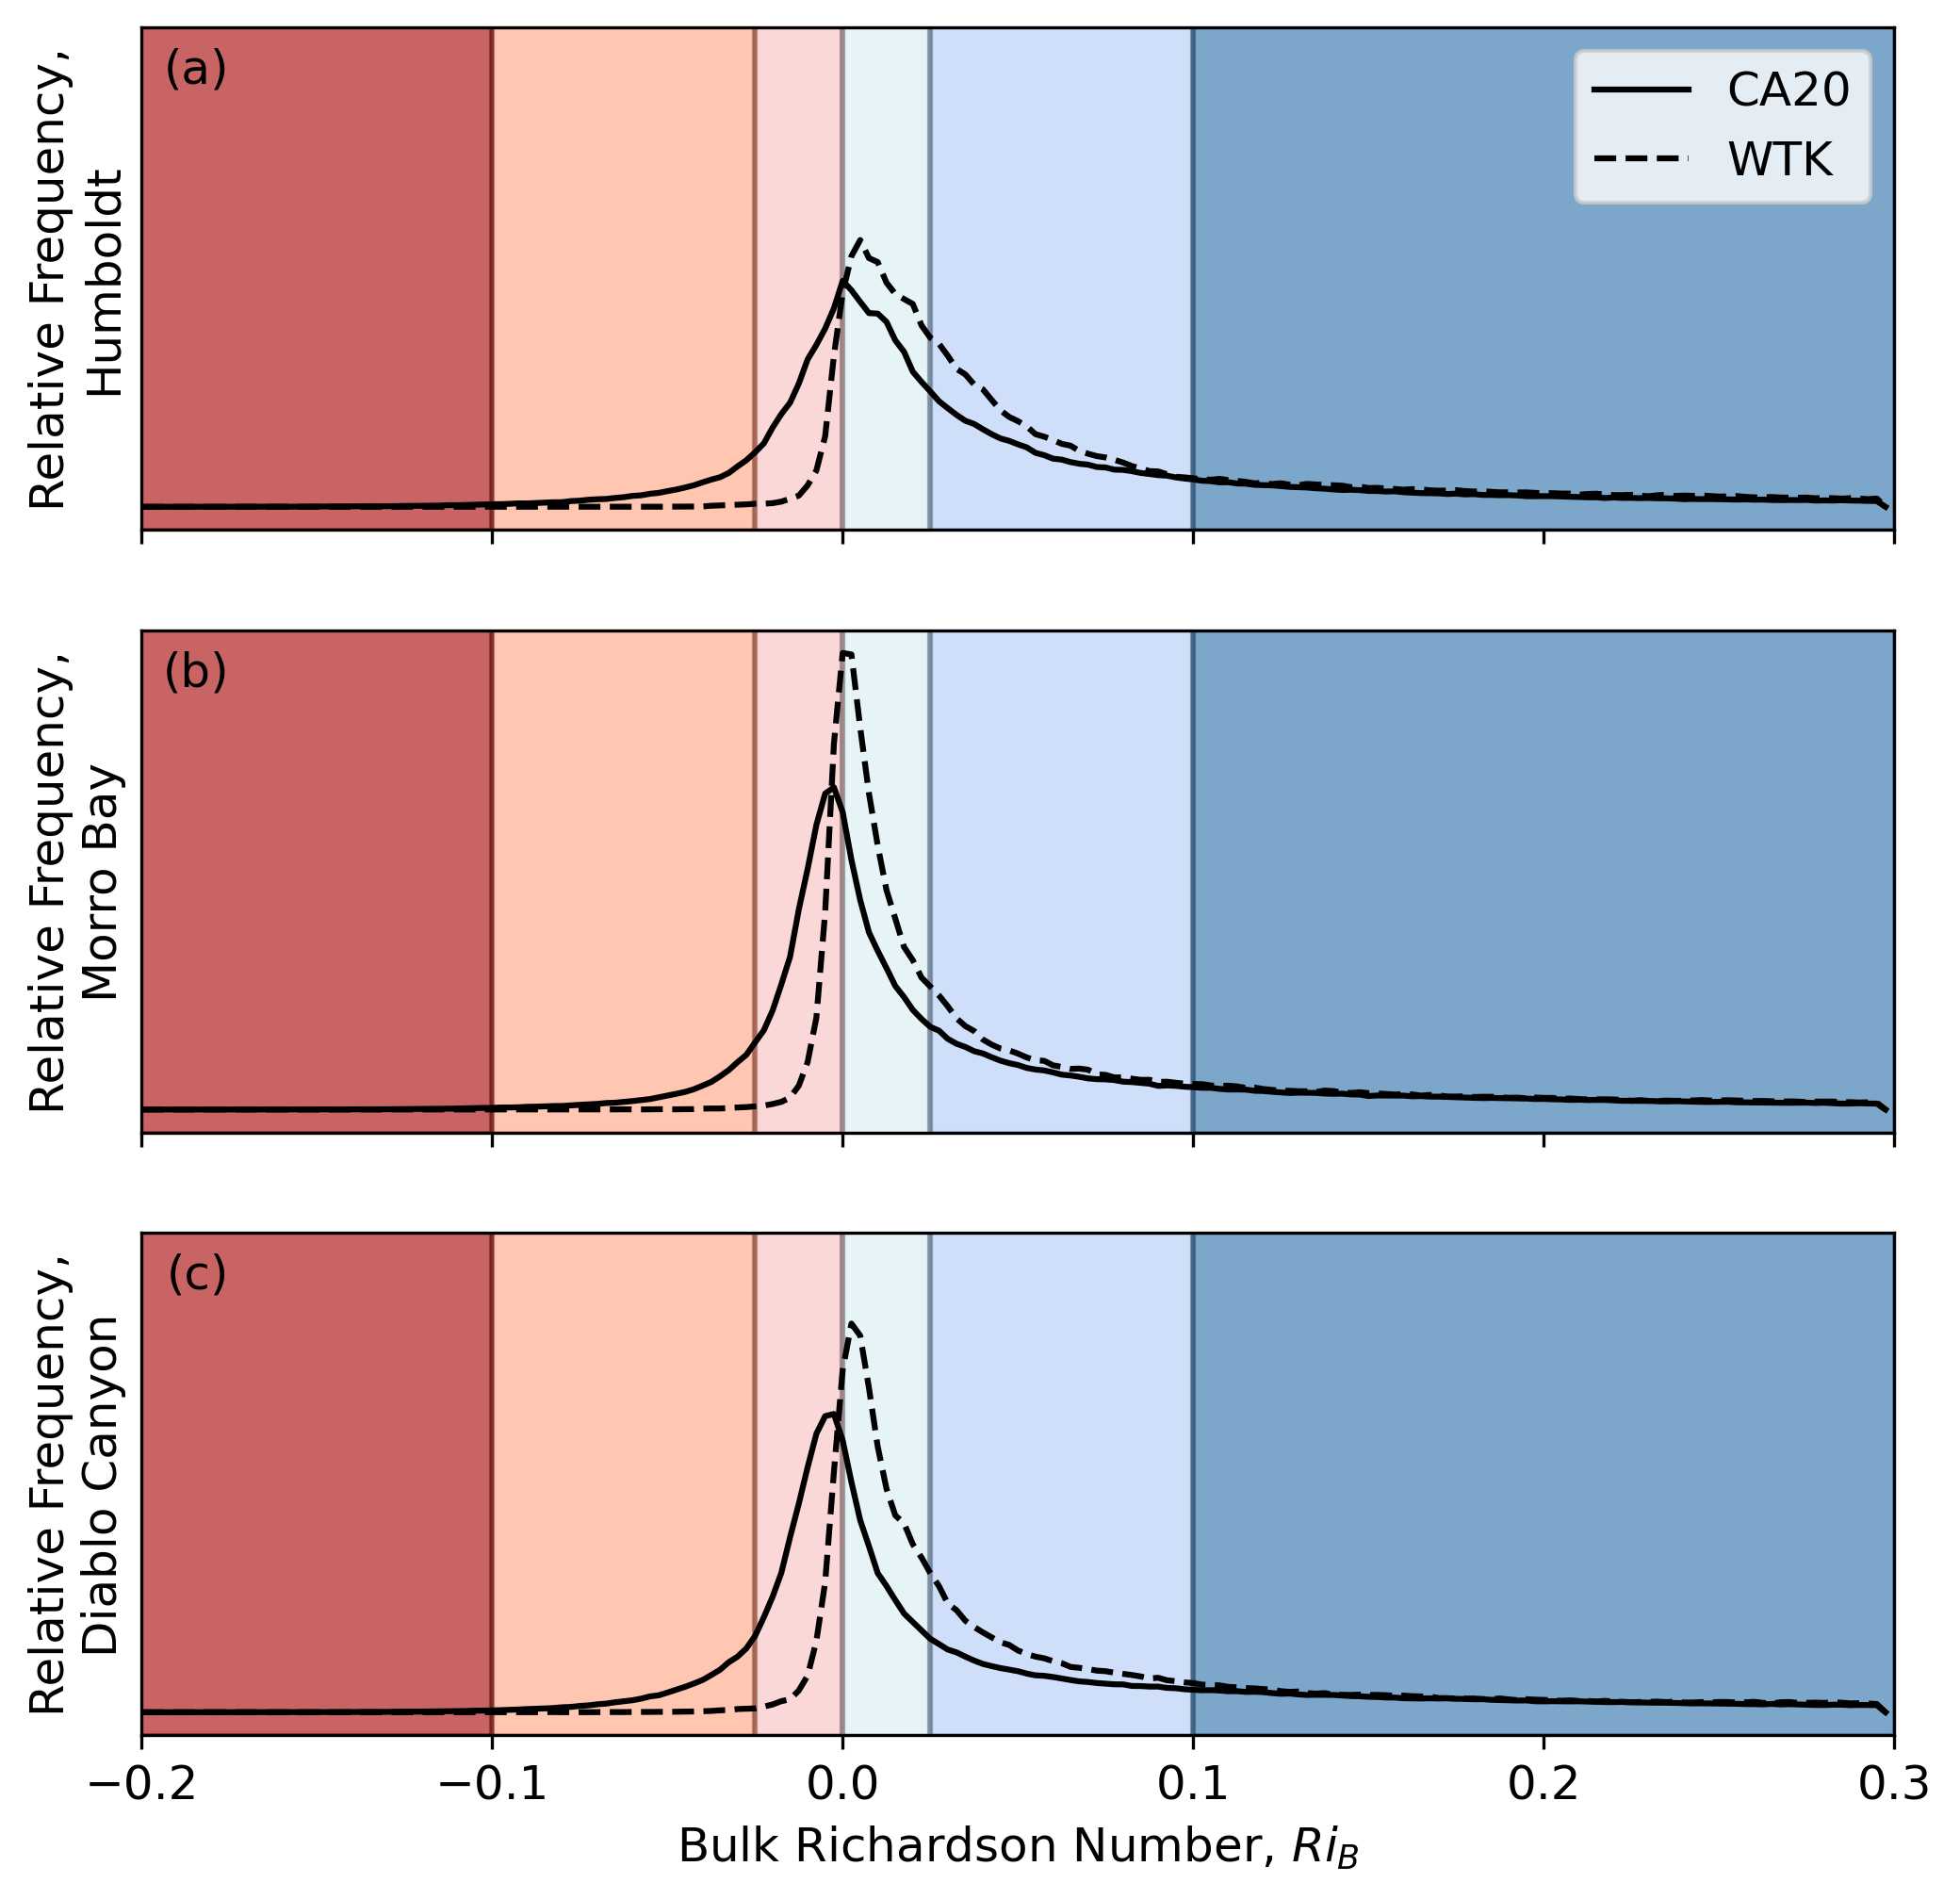

In [23]:
fig, ax = plt.subplots(3, 1, figsize=(8, 8), sharex=True, sharey=True)

ax[0].plot(ri_bins, ri_ch_hist.pdf(ri_bins),
           color='k', ls='-', label='CA20')
ax[0].plot(ri_bins, ri_wh_hist.pdf(ri_bins),
           color='k', ls='--', label='WTK')
ax[0].set_ylabel('Relative Frequency,\nHumboldt')
ax[0].legend()
ax[0].axvline(0, color='k', alpha=0.3)
ax[0].axvline(0.1, color='k', alpha=0.3)
ax[0].axvline(0.025, color='k', alpha=0.3)
ax[0].axvline(-0.1, color='k', alpha=0.3)
ax[0].axvline(-0.025, color='k', alpha=0.3)
ax[0].axvspan(0, 0.025, alpha=0.3, color='lightblue')
ax[0].axvspan(0.025, 0.1, alpha=0.3, color='cornflowerblue')
ax[0].axvspan(0.1, 0.3, alpha=0.7, color='steelblue')
ax[0].axvspan(0, -0.025, alpha=0.3, color='lightcoral')
ax[0].axvspan(-0.025, -0.1, alpha=0.3, color='orangered')
ax[0].axvspan(-0.1, -0.3, alpha=0.7, color='firebrick')
ax[0].set_xlim(-0.2, 0.3)

ax[1].plot(ri_bins, ri_cm_hist.pdf(ri_bins),
           color='k', ls='-')
ax[1].plot(ri_bins, ri_wm_hist.pdf(ri_bins),
           color='k', ls='--')
ax[1].set_ylabel('Relative Frequency,\nMorro Bay')
ax[-1].set_xlabel('Bulk Richardson Number, $Ri_B$')
ax[1].axvline(0, color='k', alpha=0.3)
ax[1].axvline(0.1, color='k', alpha=0.3)
ax[1].axvline(0.025, color='k', alpha=0.3)
ax[1].axvline(-0.1, color='k', alpha=0.3)
ax[1].axvline(-0.025, color='k', alpha=0.3)
ax[1].axvspan(0, 0.025, alpha=0.3, color='lightblue')
ax[1].axvspan(0.025, 0.1, alpha=0.3, color='cornflowerblue')
ax[1].axvspan(0.1, 0.3, alpha=0.7, color='steelblue')
ax[1].axvspan(0, -0.025, alpha=0.3, color='lightcoral')
ax[1].axvspan(-0.025, -0.1, alpha=0.3, color='orangered')
ax[1].axvspan(-0.1, -0.3, alpha=0.7, color='firebrick')
ax[1].set_xlim(-0.2, 0.3)

ax[2].plot(ri_bins, ri_cd_hist.pdf(ri_bins),
           color='k', ls='-')
ax[2].plot(ri_bins, ri_wd_hist.pdf(ri_bins),
           color='k', ls='--')
ax[2].set_ylabel('Relative Frequency,\nDiablo Canyon')
ax[2].axvline(0, color='k', alpha=0.3)
ax[2].axvline(0.1, color='k', alpha=0.3)
ax[2].axvline(0.025, color='k', alpha=0.3)
ax[2].axvline(-0.1, color='k', alpha=0.3)
ax[2].axvline(-0.025, color='k', alpha=0.3)
ax[2].axvspan(0, 0.025, alpha=0.3, color='lightblue')
ax[2].axvspan(0.025, 0.1, alpha=0.3, color='cornflowerblue')
ax[2].axvspan(0.1, 0.3, alpha=0.7, color='steelblue')
ax[2].axvspan(0, -0.025, alpha=0.3, color='lightcoral')
ax[2].axvspan(-0.025, -0.1, alpha=0.3, color='orangered')
ax[2].axvspan(-0.1, -0.3, alpha=0.7, color='firebrick')
ax[2].set_xlim(-0.2, 0.3)

ax[0].axes.get_yaxis().set_ticks([])
ax[1].axes.get_yaxis().set_ticks([])
ax[2].axes.get_yaxis().set_ticks([])

ax[0].text(0.05,
          0.89,
          '(a)',
          fontsize=12,
          transform = ax[0].transAxes,
          horizontalalignment='right',
            color='black')
ax[1].text(0.05,
          0.89,
          '(b)',
          fontsize=12,
          transform = ax[1].transAxes,
          horizontalalignment='right',
            color='black')
ax[2].text(0.05,
          0.89,
          '(c)',
          fontsize=12,
          transform = ax[2].transAxes,
          horizontalalignment='right',
            color='black')

# plt.savefig('../figures/fig12.png', bbox_inches='tight')
# plt.savefig('../figures/fig12.pdf', bbox_inches='tight')

plt.show()

In [24]:
# fig, ax = plt.subplots(2, 3, figsize=(12,8), sharex=True, sharey=True)

# shear_bins2d = np.arange(-0.2, 0.4, 0.01)
# ri_bins2d = np.arange(-0.1, 0.1, 0.01)
# # bins2d = 

# im1 = ax[0,0].hist2d(alpha_ch,
#              df_ch_filt['bulk_ri'].values,
#              bins=(shear_bins2d, ri_bins2d))
# ax[0,1].hist2d(alpha_cd,
#              df_cd_filt['bulk_ri'].values,
#              bins=(shear_bins2d, ri_bins2d))
# ax[0,2].hist2d(alpha_cm,
#              df_cm_filt['bulk_ri'].values,
#              bins=(shear_bins2d, ri_bins2d))

# ax[1,0].hist2d(alpha_wh,
#              df_wh_filt['bulk_ri'].values,
#              bins=(shear_bins2d, ri_bins2d))
# ax[1,1].hist2d(alpha_wd,
#              df_wd_filt['bulk_ri'].values,
#              bins=(shear_bins2d, ri_bins2d))
# ax[1,2].hist2d(alpha_wm,
#              df_wm_filt['bulk_ri'].values,
#              bins=(shear_bins2d, ri_bins2d))

# ax[0,0].axhline(0, color='r')
# ax[0,1].axhline(0, color='r')
# ax[0,2].axhline(0, color='r')
# ax[1,0].axhline(0, color='r')
# ax[1,1].axhline(0, color='r')
# ax[1,2].axhline(0, color='r')

# ax[0,0].axvline(1/7, color='r', ls='--')
# ax[0,1].axvline(1/7, color='r', ls='--')
# ax[0,2].axvline(1/7, color='r', ls='--')
# ax[1,0].axvline(1/7, color='r', ls='--')
# ax[1,1].axvline(1/7, color='r', ls='--')
# ax[1,2].axvline(1/7, color='r', ls='--')

# cax = fig.add_axes([ax[-1,-1].get_position().x0+0.26,ax[-1,-1].get_position().y0,0.02,ax[0,-1].get_position().y1-ax[-1,-1].get_position().y0])
# cbar = fig.colorbar(im1[3], cax=cax)
# cbar.set_label('Count', fontsize=12)
# cbar.ax.tick_params(labelsize=12)


# ax[0,0].set_ylabel('$Ri_B$')
# ax[1,0].set_ylabel('$Ri_B$')
# ax[-1,0].set_xlabel('$\\alpha$')
# ax[-1,1].set_xlabel('$\\alpha$')
# ax[-1,2].set_xlabel('$\\alpha$')

# ax[0,0].set_title('CA20, Humboldt')
# ax[0,1].set_title('CA20, Diablo Canyon')
# ax[0,2].set_title('CA20, Morro Bay')
# ax[1,0].set_title('WTK, Humboldt')
# ax[1,1].set_title('WTK, Diablo Canyon')
# ax[1,2].set_title('WTK, Morro Bay')

# ax[0,0].text(0.15,
#           0.05,
#           '(a)',
#           fontsize=14,
#           transform = ax[0,0].transAxes,
#           horizontalalignment='right',
#             color='white')
# ax[0,1].text(0.15,
#           0.05,
#           '(b)',
#           fontsize=14,
#           transform = ax[0,1].transAxes,
#           horizontalalignment='right',
#             color='white')
# ax[0,2].text(0.15,
#           0.05,
#           '(c)',
#           fontsize=14,
#           transform = ax[0,2].transAxes,
#           horizontalalignment='right',
#             color='white')
# ax[1,0].text(0.15,
#           0.05,
#           '(d)',
#           fontsize=14,
#           transform = ax[1,0].transAxes,
#           horizontalalignment='right',
#             color='white')
# ax[1,1].text(0.15,
#           0.05,
#           '(e)',
#           fontsize=14,
#           transform = ax[1,1].transAxes,
#           horizontalalignment='right',
#             color='white')
# ax[1,2].text(0.15,
#           0.05,
#           '(f)',
#           fontsize=14,
#           transform = ax[1,2].transAxes,
#           horizontalalignment='right',
#             color='white')

# # plt.savefig("../figures/shear_and_rib.png", bbox_inches='tight')


# plt.show()

### Wind Droughts
When we fall below cut-in speed, how long does that last for?

In [25]:
######## CAPACITY FACTOR BASED APPROACH
### Calculate drought intervals
capfac_thresh = 0.1   # capacity factor threshold

## ~~~~~ CA20 - Humboldt ~~~~~
drought_time_ch = capfac_ch[capfac_ch < capfac_thresh].index
print("CA20, Humboldt...")

# Calculate the start point and end point of droughts
continuous_interval = pd.Timedelta('5 minutes')
drought_starts_ch = []
drought_stops_ch = []
for i in range(len(drought_time_ch)-1):
    in_drought_flag = False
    curr_time = drought_time_ch[i]
    next_time = drought_time_ch[i+1]
    if next_time - curr_time != continuous_interval:
        drought_starts_ch.append(next_time)
        drought_stops_ch.append(curr_time)

# Calculate drought length
drought_stops_ch.pop(0)   # Remove the first stop date
drought_starts_ch.pop()   # Remove the last start date
drought_lens = []
for i in range(len(drought_stops_ch)):
    drought_lens.append(drought_stops_ch[i] - drought_starts_ch[i])
    
# Convert from list to array that is in units of hrs
drought_lens_temp = np.zeros(len(drought_lens))
for i in range(len(drought_lens_temp)):
    drought_lens_temp[i] = drought_lens[i] / np.timedelta64(1, 'h')
drought_lens_ch = drought_lens_temp.copy()

## ~~~~~ CA20 - Diablo Canyon ~~~~~
drought_time_cd = capfac_cd[capfac_cd < capfac_thresh].index
print("CA20, Diablo Canyon...")

# Calculate the start point and end point of droughts
continuous_interval = pd.Timedelta('5 minutes')
drought_starts_cd = []
drought_stops_cd = []
for i in range(len(drought_time_cd)-1):
    in_drought_flag = False
    curr_time = drought_time_cd[i]
    next_time = drought_time_cd[i+1]
    if next_time - curr_time != continuous_interval:
        drought_starts_cd.append(next_time)
        drought_stops_cd.append(curr_time)

# Calculate drought length
drought_stops_cd.pop(0)   # Remove the first stop date
drought_starts_cd.pop()   # Remove the last start date
drought_lens = []
for i in range(len(drought_stops_cd)):
    drought_lens.append(drought_stops_cd[i] - drought_starts_cd[i])
    
# Convert from list to array that is in units of hrs
drought_lens_temp = np.zeros(len(drought_lens))
for i in range(len(drought_lens_temp)):
    drought_lens_temp[i] = drought_lens[i] / np.timedelta64(1, 'h')
drought_lens_cd = drought_lens_temp.copy()

## ~~~~~ CA20 - Morro Bay ~~~~~
drought_time_cm = capfac_cm[capfac_cm < capfac_thresh].index
print("CA20, Morro Bay...")

# Calculate the start point and end point of droughts
continuous_interval = pd.Timedelta('5 minutes')
drought_starts_cm = []
drought_stops_cm = []
for i in range(len(drought_time_cm)-1):
    in_drought_flag = False
    curr_time = drought_time_cm[i]
    next_time = drought_time_cm[i+1]
    if next_time - curr_time != continuous_interval:
        drought_starts_cm.append(next_time)
        drought_stops_cm.append(curr_time)

# Calculate drought length
drought_stops_cm.pop(0)   # Remove the first stop date
drought_starts_cm.pop()   # Remove the last start date
drought_lens = []
for i in range(len(drought_stops_cm)):
    drought_lens.append(drought_stops_cm[i] - drought_starts_cm[i])
    
# Convert from list to array that is in units of hrs
drought_lens_temp = np.zeros(len(drought_lens))
for i in range(len(drought_lens_temp)):
    drought_lens_temp[i] = drought_lens[i] / np.timedelta64(1, 'h')
drought_lens_cm = drought_lens_temp.copy()

## ~~~~~ WTK - Humboldt ~~~~~
drought_time_wh = capfac_wh[capfac_wh < capfac_thresh].index
print("WTK, Humboldt...")

# Calculate the start point and end point of droughts
continuous_interval = pd.Timedelta('5 minutes')
drought_starts_wh = []
drought_stops_wh = []
for i in range(len(drought_time_wh)-1):
    in_drought_flag = False
    curr_time = drought_time_wh[i]
    next_time = drought_time_wh[i+1]
    if next_time - curr_time != continuous_interval:
        drought_starts_wh.append(next_time)
        drought_stops_wh.append(curr_time)

# Calculate drought length
drought_stops_wh.pop(0)   # Remove the first stop date
drought_starts_wh.pop()   # Remove the last start date
drought_lens = []
for i in range(len(drought_stops_wh)):
    drought_lens.append(drought_stops_wh[i] - drought_starts_wh[i])
    
# Convert from list to array that is in units of hrs
drought_lens_temp = np.zeros(len(drought_lens))
for i in range(len(drought_lens_temp)):
    drought_lens_temp[i] = drought_lens[i] / np.timedelta64(1, 'h')
drought_lens_wh = drought_lens_temp.copy()

## ~~~~~ WTK - Diablo Canyon ~~~~~
drought_time_wd = capfac_wd[capfac_wd < capfac_thresh].index
print("WTK, Diablo Canyon...")

# Calculate the start point and end point of droughts
continuous_interval = pd.Timedelta('5 minutes')
drought_starts_wd = []
drought_stops_wd = []
for i in range(len(drought_time_wd)-1):
    in_drought_flag = False
    curr_time = drought_time_wd[i]
    next_time = drought_time_wd[i+1]
    if next_time - curr_time != continuous_interval:
        drought_starts_wd.append(next_time)
        drought_stops_wd.append(curr_time)

# Calculate drought length
drought_stops_wd.pop(0)   # Remove the first stop date
drought_starts_wd.pop()   # Remove the last start date
drought_lens = []
for i in range(len(drought_stops_wd)):
    drought_lens.append(drought_stops_wd[i] - drought_starts_wd[i])
    
# Convert from list to array that is in units of hrs
drought_lens_temp = np.zeros(len(drought_lens))
for i in range(len(drought_lens_temp)):
    drought_lens_temp[i] = drought_lens[i] / np.timedelta64(1, 'h')
drought_lens_wd = drought_lens_temp.copy()

## ~~~~~ WTK - Morro Bay ~~~~~
drought_time_wm = capfac_wm[capfac_wm < capfac_thresh].index
print("WTK, Morro Bay...")

# Calculate the start point and end point of droughts
continuous_interval = pd.Timedelta('5 minutes')
drought_starts_wm = []
drought_stops_wm = []
for i in range(len(drought_time_wm)-1):
    in_drought_flag = False
    curr_time = drought_time_wm[i]
    next_time = drought_time_wm[i+1]
    if next_time - curr_time != continuous_interval:
        drought_starts_wm.append(next_time)
        drought_stops_wm.append(curr_time)

# Calculate drought length
drought_stops_wm.pop(0)   # Remove the first stop date
drought_starts_wm.pop()   # Remove the last start date
drought_lens = []
for i in range(len(drought_stops_wm)):
    drought_lens.append(drought_stops_wm[i] - drought_starts_wm[i])
    
# Convert from list to array that is in units of hrs
drought_lens_temp = np.zeros(len(drought_lens))
for i in range(len(drought_lens_temp)):
    drought_lens_temp[i] = drought_lens[i] / np.timedelta64(1, 'h')
drought_lens_wm = drought_lens_temp.copy()

CA20, Humboldt...
CA20, Diablo Canyon...
CA20, Morro Bay...
WTK, Humboldt...
WTK, Diablo Canyon...
WTK, Morro Bay...


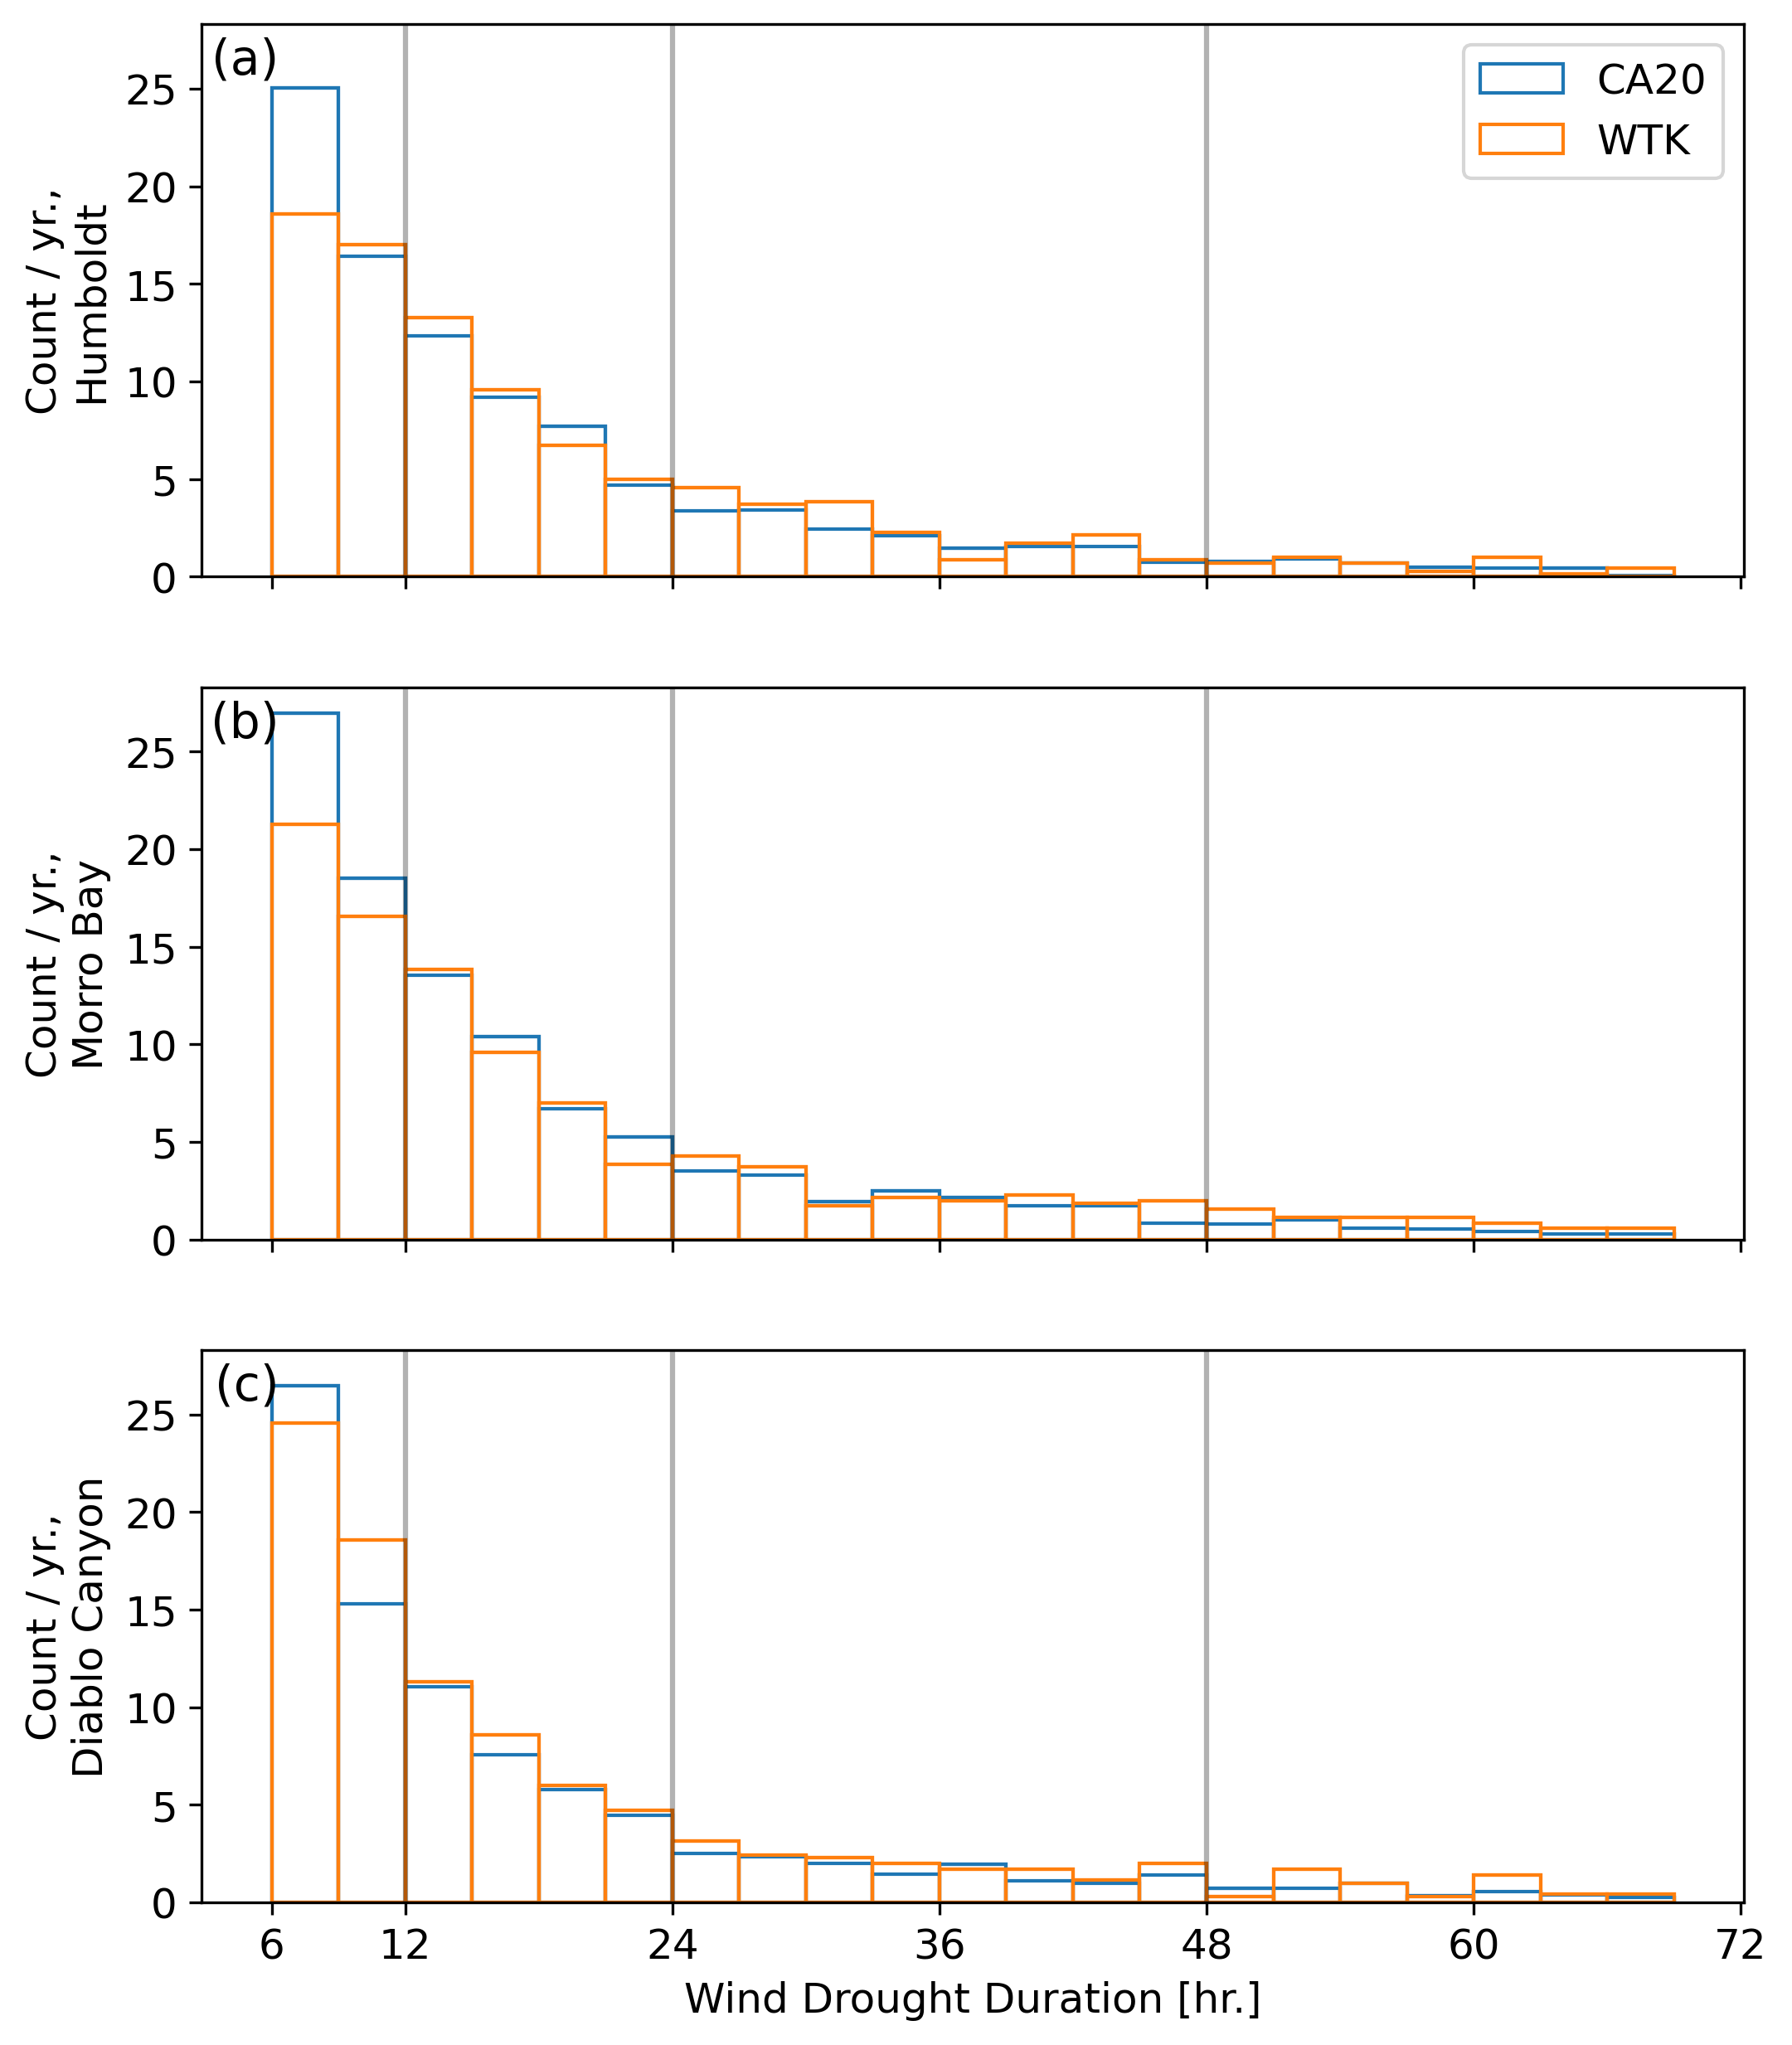

In [26]:
fig, ax = plt.subplots(3, 1, figsize=(8, 10), dpi=300, sharex=True, sharey=True)

drought_bins = np.arange(6, 72, 3)
weights_c1 = np.ones_like(drought_lens_ch)*(1/20)
weights_w1 = np.ones_like(drought_lens_wh)*(1/7)
weights_c2 = np.ones_like(drought_lens_cd)*(1/20)
weights_w2 = np.ones_like(drought_lens_wd)*(1/7)
weights_c3 = np.ones_like(drought_lens_cm)*(1/20)
weights_w3 = np.ones_like(drought_lens_wm)*(1/7)

# Plot four histograms in one figure to be able to see everyone
ax[0].hist(drought_lens_ch,
             bins=drought_bins,
             range=(drought_bins.min(), drought_bins.max()),
             weights=weights_c1,
             edgecolor='C0', color='white', ls='-',
             label='CA20')
ax[0].hist(drought_lens_wh,
             bins=drought_bins,
             range=(drought_bins.min(), drought_bins.max()),
             weights=weights_w1,
             edgecolor='C1', color='white', ls='-',
             label='WTK')
ax[0].hist(drought_lens_ch,
             bins=drought_bins,
             range=(drought_bins.min(), drought_bins.max()),
             weights=weights_c1,
             edgecolor='C0', facecolor='None', ls='-')
ax[0].hist(drought_lens_wh,
             bins=drought_bins,
             range=(drought_bins.min(), drought_bins.max()),
             weights=weights_w1,
             edgecolor='C1', facecolor='None', ls='-')

ax[1].hist(drought_lens_cm,
             bins=drought_bins,
             range=(drought_bins.min(), drought_bins.max()),
             weights=weights_c3,
             edgecolor='C0', color='white', ls='-',
             label='CA20')
ax[1].hist(drought_lens_wm,
             bins=drought_bins,
             range=(drought_bins.min(), drought_bins.max()),
             weights=weights_w3,
             edgecolor='C1', color='white', ls='-',
             label='WTK')
ax[1].hist(drought_lens_cm,
             bins=drought_bins,
             range=(drought_bins.min(), drought_bins.max()),
             weights=weights_c3,
             edgecolor='C0', facecolor='None', ls='-')
ax[1].hist(drought_lens_wm,
             bins=drought_bins,
             range=(drought_bins.min(), drought_bins.max()),
             weights=weights_w3,
             edgecolor='C1', facecolor='None', ls='-')


ax[2].hist(drought_lens_cd,
             bins=drought_bins,
             range=(drought_bins.min(), drought_bins.max()),
             weights=weights_c2,
             edgecolor='C0', color='white', ls='-',
             label='CA20')
ax[2].hist(drought_lens_wd,
             bins=drought_bins,
             range=(drought_bins.min(), drought_bins.max()),
             weights=weights_w2,
             edgecolor='C1', color='white', ls='-',
             label='WTK')
ax[2].hist(drought_lens_cd,
             bins=drought_bins,
             range=(drought_bins.min(), drought_bins.max()),
             weights=weights_c2,
             edgecolor='C0', facecolor='None', ls='-')
ax[2].hist(drought_lens_wd,
             bins=drought_bins,
             range=(drought_bins.min(), drought_bins.max()),
             weights=weights_w2,
             edgecolor='C1', facecolor='None', ls='-')


ax[0].legend()
ax[0].set_ylabel('Count / yr.,\nHumboldt')
ax[1].set_ylabel('Count / yr.,\nMorro Bay')
ax[2].set_ylabel('Count / yr.,\nDiablo Canyon')
ax[-1].set_xlabel('Wind Drought Duration [hr.]')

ax[0].set_xticks([6, 12, 24, 36, 48, 60, 72])
ax[1].set_xticks([6, 12, 24, 36, 48, 60, 72])
ax[2].set_xticks([6, 12, 24, 36, 48, 60, 72])

ax[0].axvline(12, ls='-', color='k', alpha=0.3)
ax[0].axvline(24, ls='-', color='k', alpha=0.3)
ax[0].axvline(48, ls='-', color='k', alpha=0.3)
ax[1].axvline(12, ls='-', color='k', alpha=0.3)
ax[1].axvline(24, ls='-', color='k', alpha=0.3)
ax[1].axvline(48, ls='-', color='k', alpha=0.3)
ax[2].axvline(12, ls='-', color='k', alpha=0.3)
ax[2].axvline(24, ls='-', color='k', alpha=0.3)
ax[2].axvline(48, ls='-', color='k', alpha=0.3)

ax[0].text(0.05,
          0.91,
          '(a)',
          fontsize=14,
          transform = ax[0].transAxes,
          horizontalalignment='right',
            color='black')
ax[1].text(0.05,
          0.91,
          '(b)',
          fontsize=14,
          transform = ax[1].transAxes,
          horizontalalignment='right',
            color='black')
ax[2].text(0.05,
          0.91,
          '(c)',
          fontsize=14,
          transform = ax[2].transAxes,
          horizontalalignment='right',
            color='black')


# plt.savefig('../figures/fig16.png', bbox_inches='tight')
# plt.savefig('../figures/fig16.pdf', bbox_inches='tight')

plt.show()

In [27]:
print("Droughts less than 12 hours, per year")

print("CA20, Humboldt -\t", np.sum((drought_lens_ch > 6) & (drought_lens_ch <12)) / 20)
print("CA20, Diablo Canyon -\t", np.sum((drought_lens_cd > 6) & (drought_lens_cd <12)) / 20)
print("CA20, Morro Bay -\t", np.sum((drought_lens_cm > 6) & (drought_lens_cm <12)) / 20)

print("WTK, Humboldt -\t", np.sum((drought_lens_wh > 6) & (drought_lens_wh <12)) / 7)
print("WTK, Diablo Canyon -\t", np.sum((drought_lens_wd > 6) & (drought_lens_wd <12)) / 7)
print("WTK, Morro Bay -\t", np.sum((drought_lens_wm > 6) & (drought_lens_wm <12)) / 7)

print("\nBetween 12 and 24 hours, per year")

print("CA20, Humboldt -\t", np.sum((drought_lens_ch > 12) & (drought_lens_ch <24)) / 20)
print("CA20, Diablo Canyon -\t", np.sum((drought_lens_cd > 12) & (drought_lens_cd <24)) / 20)
print("CA20, Morro Bay -\t", np.sum((drought_lens_cm > 12) & (drought_lens_cm <24)) / 20)

print("WTK, Humboldt -\t", np.sum((drought_lens_wh > 12) & (drought_lens_wh <24)) / 7)
print("WTK, Diablo Canyon -\t", np.sum((drought_lens_wd > 12) & (drought_lens_wd <24)) / 7)
print("WTK, Morro Bay -\t", np.sum((drought_lens_wm > 12) & (drought_lens_wm <24)) / 7)

print("\nBetween 24 and 48 hours, per year")

print("CA20, Humboldt -\t", np.sum((drought_lens_ch > 24) & (drought_lens_ch <48)) / 20)
print("CA20, Diablo Canyon -\t", np.sum((drought_lens_cd > 24) & (drought_lens_cd <48)) / 20)
print("CA20, Morro Bay -\t", np.sum((drought_lens_cm > 24) & (drought_lens_cm <48)) / 20)

print("WTK, Humboldt -\t", np.sum((drought_lens_wh > 24) & (drought_lens_wh <48)) / 7)
print("WTK, Diablo Canyon -\t", np.sum((drought_lens_wd > 24) & (drought_lens_wd <48)) / 7)
print("WTK, Morro Bay -\t", np.sum((drought_lens_wm > 24) & (drought_lens_wm <48)) / 7)

print("\nBetween 48 and 72 hours, per year")

print("CA20, Humboldt -\t", np.sum((drought_lens_ch > 48) & (drought_lens_ch <72)) / 20)
print("CA20, Diablo Canyon -\t", np.sum((drought_lens_cd > 48) & (drought_lens_cd <72)) / 20)
print("CA20, Morro Bay -\t", np.sum((drought_lens_cm > 48) & (drought_lens_cm <72)) / 20)

print("WTK, Humboldt -\t", np.sum((drought_lens_wh > 48) & (drought_lens_wh <72)) / 7)
print("WTK, Diablo Canyon -\t", np.sum((drought_lens_wd > 48) & (drought_lens_wd <72)) / 7)
print("WTK, Morro Bay -\t", np.sum((drought_lens_wm > 48) & (drought_lens_wm <72)) / 7)

print("\nDroughts longer than 72 hours, per year")
print("CA20, Humboldt -\t", np.sum(drought_lens_ch > 72) / 20)
print("CA20, Diablo Canyon -\t", np.sum(drought_lens_cd > 72) / 20)
print("CA20, Morro Bay -\t", np.sum(drought_lens_cm > 72) / 20)

print("WTK, Humboldt -\t", np.sum(drought_lens_wh > 72) / 7)
print("WTK, Diablo Canyon -\t", np.sum(drought_lens_wd > 72) / 7)
print("WTK, Morro Bay -\t", np.sum(drought_lens_wm > 72) / 7)

Droughts less than 12 hours, per year
CA20, Humboldt -	 40.55
CA20, Diablo Canyon -	 40.75
CA20, Morro Bay -	 44.7
WTK, Humboldt -	 34.57142857142857
WTK, Diablo Canyon -	 41.857142857142854
WTK, Morro Bay -	 37.285714285714285

Between 12 and 24 hours, per year
CA20, Humboldt -	 33.45
CA20, Diablo Canyon -	 28.45
CA20, Morro Bay -	 35.35
WTK, Humboldt -	 34.0
WTK, Diablo Canyon -	 30.142857142857142
WTK, Morro Bay -	 34.0

Between 24 and 48 hours, per year
CA20, Humboldt -	 16.45
CA20, Diablo Canyon -	 13.75
CA20, Morro Bay -	 17.55
WTK, Humboldt -	 19.857142857142858
WTK, Diablo Canyon -	 16.285714285714285
WTK, Morro Bay -	 19.571428571428573

Between 48 and 72 hours, per year
CA20, Humboldt -	 3.85
CA20, Diablo Canyon -	 4.2
CA20, Morro Bay -	 4.2
WTK, Humboldt -	 4.428571428571429
WTK, Diablo Canyon -	 5.857142857142857
WTK, Morro Bay -	 7.571428571428571

Droughts longer than 72 hours, per year
CA20, Humboldt -	 1.4
CA20, Diablo Canyon -	 1.95
CA20, Morro Bay -	 1.65
WTK, Humbold

In [28]:
### Arrange drought info in a dataframe for easier access
drought_stats_ch = np.zeros((len(drought_starts_ch), 3))
drought_stats_ch = pd.DataFrame(drought_stats_ch, columns=['Start', 'Stop', 'Duration'])
drought_stats_ch['Start'] = drought_starts_ch
drought_stats_ch['Stop'] = drought_stops_ch
drought_stats_ch['Duration'] = drought_lens_ch
drought_stats_ch.set_index('Start', inplace=True)
drought_stats_ch = drought_stats_ch[drought_stats_ch['Duration'] > 6]

drought_stats_cd = np.zeros((len(drought_starts_cd), 3))
drought_stats_cd = pd.DataFrame(drought_stats_cd, columns=['Start', 'Stop', 'Duration'])
drought_stats_cd['Start'] = drought_starts_cd
drought_stats_cd['Stop'] = drought_stops_cd
drought_stats_cd['Duration'] = drought_lens_cd
drought_stats_cd.set_index('Start', inplace=True)
drought_stats_cd = drought_stats_cd[drought_stats_cd['Duration'] > 6]

drought_stats_cm = np.zeros((len(drought_starts_cm), 3))
drought_stats_cm = pd.DataFrame(drought_stats_cm, columns=['Start', 'Stop', 'Duration'])
drought_stats_cm['Start'] = drought_starts_cm
drought_stats_cm['Stop'] = drought_stops_cm
drought_stats_cm['Duration'] = drought_lens_cm
drought_stats_cm.set_index('Start', inplace=True)
drought_stats_cm = drought_stats_cm[drought_stats_cm['Duration'] > 6]

In [29]:
### Flag drought windows
drought_flag_ch = pd.Series(np.zeros(len(df_ch)), index=df_ch.index)
drought_flag_cd = pd.Series(np.zeros(len(df_cd)), index=df_cd.index)
drought_flag_cm = pd.Series(np.zeros(len(df_cm)), index=df_cm.index)

print("Humboldt...")
for i in range(len(drought_stats_ch)):
    if i % 250 == 0: print('\t',i)
    start = drought_stats_ch.index[i]
    stop = drought_stats_ch['Stop'].iloc[i]
    drought_flag_ch[(drought_flag_ch.index > start) & (drought_flag_ch.index < stop)] = 1
    
print("Diablo Canyon...")
for i in range(len(drought_stats_cd)):
    if i % 250 == 0: print('\t',i)
    start = drought_stats_cd.index[i]
    stop = drought_stats_cd['Stop'].iloc[i]
    drought_flag_cd[(drought_flag_cd.index > start) & (drought_flag_cd.index < stop)] = 1
    
print("Morro Bay...")
for i in range(len(drought_stats_cm)):
    if i % 250 == 0: print('\t',i)
    start = drought_stats_cm.index[i]
    stop = drought_stats_cm['Stop'].iloc[i]
    drought_flag_cm[(drought_flag_cm.index > start) & (drought_flag_cm.index < stop)] = 1

Humboldt...
	 0
	 250
	 500
	 750
	 1000
	 1250
	 1500
	 1750
Diablo Canyon...
	 0
	 250
	 500
	 750
	 1000
	 1250
	 1500
	 1750
Morro Bay...
	 0
	 250
	 500
	 750
	 1000
	 1250
	 1500
	 1750
	 2000


In [30]:
drought_flag_all = drought_flag_ch + drought_flag_cd + drought_flag_cm

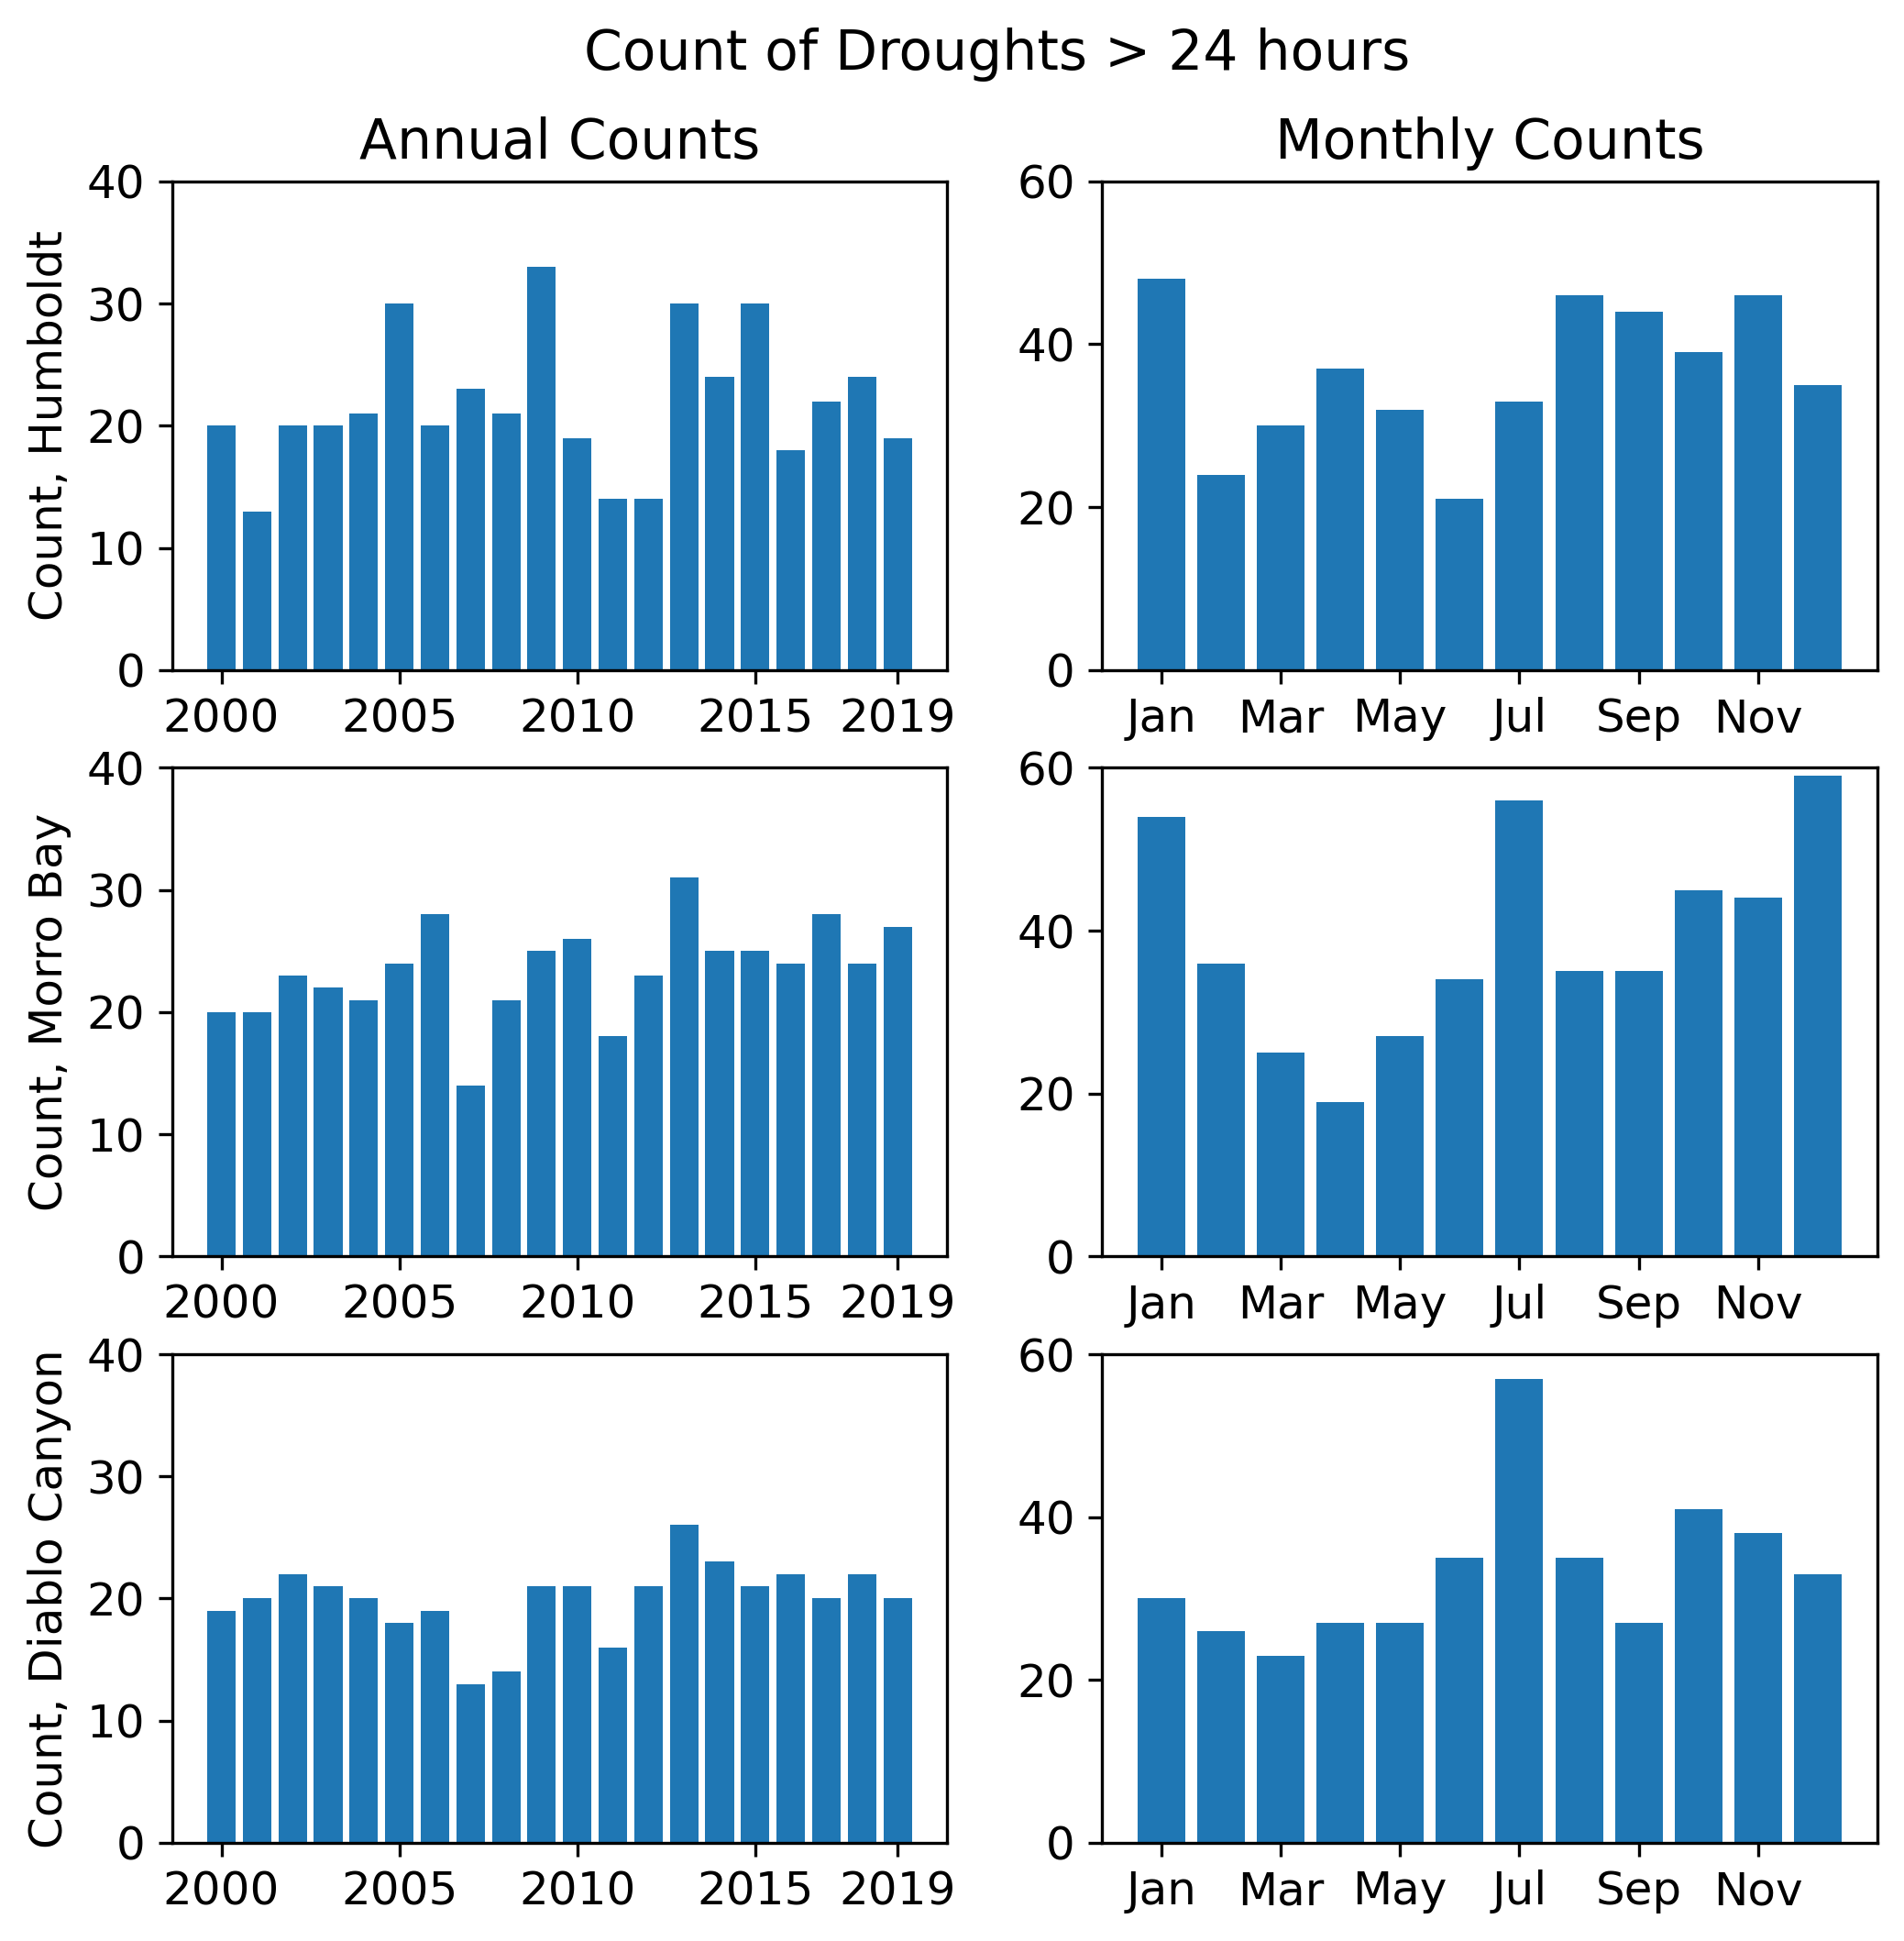

In [31]:
fig, ax = plt.subplots(3, 2, figsize=(8,8))

year_bins = np.arange(2000, 2021, 1)

offset = -.4
dr_yhist_ch = np.histogram(drought_stats_ch[drought_stats_ch['Duration'] > 24*1].index.year.values,
                     bins=year_bins)
dr_yhist_cd = np.histogram(drought_stats_cd[drought_stats_cd['Duration'] > 24*1].index.year.values,
                     bins=year_bins)
dr_yhist_cm = np.histogram(drought_stats_cm[drought_stats_cm['Duration'] > 24*1].index.year.values,
                     bins=year_bins)


ax[0,0].bar(dr_yhist_ch[1][:-1],dr_yhist_ch[0])
ax[1,0].bar(dr_yhist_cm[1][:-1],dr_yhist_cm[0])
ax[2,0].bar(dr_yhist_cd[1][:-1],dr_yhist_cd[0])
ax[0,0].set_xticks([2000, 2005, 2010, 2015, 2019])
ax[1,0].set_xticks([2000, 2005, 2010, 2015, 2019])
ax[2,0].set_xticks([2000, 2005, 2010, 2015, 2019])
ax[0,0].set_ylim(0, 40)
ax[1,0].set_ylim(0, 40)
ax[2,0].set_ylim(0, 40)
ax[0,0].set_ylabel('Count, Humboldt')
ax[1,0].set_ylabel('Count, Morro Bay')
ax[2,0].set_ylabel('Count, Diablo Canyon')
ax[0,0].set_title('Annual Counts')


bins = np.arange(1, 14, 1)

dr_mhist_ch = np.histogram(drought_stats_ch[drought_stats_ch['Duration'] > 24*1].index.month.values,
                     bins=bins)
dr_mhist_cd = np.histogram(drought_stats_cd[drought_stats_cd['Duration'] > 24*1].index.month.values,
                     bins=bins)
dr_mhist_cm = np.histogram(drought_stats_cm[drought_stats_cm['Duration'] > 24*1].index.month.values,
                     bins=bins)

ax[0,1].bar(dr_mhist_ch[1][:-1],dr_mhist_ch[0])
ax[1,1].bar(dr_mhist_cm[1][:-1],dr_mhist_cm[0])
ax[2,1].bar(dr_mhist_cd[1][:-1],dr_mhist_cd[0])
ax[0,1].set_xticks([1, 3, 5, 7, 9, 11])
ax[1,1].set_xticks([1, 3, 5, 7, 9, 11])
ax[2,1].set_xticks([1, 3, 5, 7, 9, 11])
ax[0,1].set_xticklabels(['Jan', 'Mar', 'May', 'Jul', 'Sep', 'Nov'])
ax[1,1].set_xticklabels(['Jan', 'Mar', 'May', 'Jul', 'Sep', 'Nov'])
ax[2,1].set_xticklabels(['Jan', 'Mar', 'May', 'Jul', 'Sep', 'Nov'])
ax[0,1].set_ylim(0, 60)
ax[1,1].set_ylim(0, 60)
ax[2,1].set_ylim(0, 60)
ax[0,1].set_title('Monthly Counts')

plt.suptitle("Count of Droughts > 24 hours", y=0.95)

# plt.savefig('../figures/fig17.png', bbox_inches='tight')
# plt.savefig('../figures/fig17.pdf', bbox_inches='tight')

plt.show()